# Abnormal HbA1c Results During COVID-19

This notebook describes deviations in HbA1c test results during the COVID-19 pandemic at large and by specific demographic groups. The following measures are reported: 
1. Absolute count of tests and abnormal results (by age, sex, ethnicity, region, IMD, diabetes type, learning disability, mental illness diagnosis)
2. Percentage of abnormal results of total number of tests taken (by age, sex, ethnicity, region, IMD, diabetes type, learning disability, mental illness diagnosis)
3. Absolute count of tests and abnormal results of tests taken by patients with type 1 diabetes (by age, sex, ethnicity, region, IMD, learning disability, mental illness diagnosis)
4. Percentage of abnormal results of tests taken by patients with type 1 diabetes (by age, sex, ethnicity, region, IMD, learning disability, mental illness diagnosis)
5. Absolute count of tests and abnormal results of tests taken by patients with type 2 diabetes (by age, sex, ethnicity, region, IMD, learning disability, mental illness diagnosis)
6. Percentage of abnormal results of tests taken by patients with type 2 diabetes (by age, sex, ethnicity, region, IMD, learning disability, mental illness diagnosis)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', None)

In [2]:
# Import measures
def import_df(f_path):
    df = pd.read_csv("../output/data/{}.csv".format(f_path))
    # Sort data by date
    df['date'] = pd.to_datetime(df.date)
    df.sort_values(by='date')
    # Create percent of population
    df['pct'] = df['value']*100
    return df

# Filter data
def filter_df(df, flag):
    return df.loc[df[flag] == 1]

# Create charts
def create_chart(measure, ylabel, title, group, df, y_min, y_max):
    plt.figure(figsize = (15,8))
    # Plot error bars if full population chart
    if (
        group == 'population'
    ):
        ax = sns.lineplot(x = 'date', y = measure, data = df)
    else:
        ax = sns.lineplot(x = 'date', y = measure, hue = group, data = df, ci=None)
        ax.legend().set_title(None)
    locs, labels = plt.xticks()
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    if measure != 'pct':
        plt.gca().set_ylim(bottom=y_min)
    else:
        plt.gca().set_ylim(y_min, y_max)
    if (group == 'age') | (group == 'region') | (group == 'imd'):
        plt.legend(loc='lower left')
    plt.setp(labels, rotation=65)
    plt.title(title + '\n')
    plt.show()
    print('\n')

In [3]:
# Total tests
df_pop = import_df('measure_hba1c_abnormal')
df_dm = import_df('measure_hba1c_abnormal_by_diabetes_type')
df_sex = import_df('measure_hba1c_abnormal_by_sex')
df_age = import_df('measure_hba1c_abnormal_by_age')
df_region = import_df('measure_hba1c_abnormal_by_region')
df_imd = import_df('measure_hba1c_abnormal_by_imd')
df_eth = import_df('measure_hba1c_abnormal_by_ethnicity')
df_mi = import_df('measure_hba1c_abnormal_by_mental_illness')
df_ld = import_df('measure_hba1c_abnormal_by_learning_disability')

In [4]:
# T1 Diabetes
df_pop_t1 = filter_df(import_df('measure_t1dm_hba1c_abnormal'),'diabetes_t1')
df_sex_t1 = filter_df(import_df('measure_t1dm_hba1c_abnormal_by_sex'),'diabetes_t1')
df_age_t1 = filter_df(import_df('measure_t1dm_hba1c_abnormal_by_age'),'diabetes_t1')
df_region_t1 = filter_df(import_df('measure_t1dm_hba1c_abnormal_by_region'),'diabetes_t1')
df_imd_t1 = filter_df(import_df('measure_t1dm_hba1c_abnormal_by_imd'),'diabetes_t1')
df_eth_t1 = filter_df(import_df('measure_t1dm_hba1c_abnormal_by_ethnicity'),'diabetes_t1')
df_mi_t1 = filter_df(import_df('measure_t1dm_hba1c_abnormal_by_mental_illness'),'diabetes_t1')
df_ld_t1 = filter_df(import_df('measure_t1dm_hba1c_abnormal_by_learning_disability'),'diabetes_t1')

In [5]:
# T2 Diabetes
df_pop_t2 = filter_df(import_df('measure_t2dm_hba1c_abnormal'),'diabetes_t2')
df_sex_t2 = filter_df(import_df('measure_t2dm_hba1c_abnormal_by_sex'),'diabetes_t2')
df_age_t2 = filter_df(import_df('measure_t2dm_hba1c_abnormal_by_age'),'diabetes_t2')
df_region_t2 = filter_df(import_df('measure_t2dm_hba1c_abnormal_by_region'),'diabetes_t2')
df_imd_t2 = filter_df(import_df('measure_t2dm_hba1c_abnormal_by_imd'),'diabetes_t2')
df_eth_t2 = filter_df(import_df('measure_t2dm_hba1c_abnormal_by_ethnicity'),'diabetes_t2')
df_mi_t2 = filter_df(import_df('measure_t2dm_hba1c_abnormal_by_mental_illness'),'diabetes_t2')
df_ld_t2 = filter_df(import_df('measure_t2dm_hba1c_abnormal_by_learning_disability'),'diabetes_t2')

In [6]:
# Format ethnicity
dict_eth = {1: 'White', 2: 'Mixed', 3: 'Asian',
            4: 'Black', 5: 'Other', np.nan: 'Unknown',
            0: 'Unknown'}
df_eth = df_eth.replace({"ethnicity": dict_eth})
df_eth_t1 = df_eth_t1.replace({"ethnicity": dict_eth})
df_eth_t2 = df_eth_t2.replace({"ethnicity": dict_eth})

In [7]:
# Format learning disability label
dict_ld = {1:'Yes', 0:'No'}
df_ld = df_ld.replace({'learning_disability': dict_ld})
df_ld_t1 = df_ld_t1.replace({'learning_disability': dict_ld})
df_ld_t2 = df_ld_t2.replace({'learning_disability': dict_ld})

In [8]:
# Format diabetes type 
dict_dm_type = {'NO_DM': 'No diabetes', 'T1DM': 'Type 1', 
                'T2DM': 'Type 2', 'UNKNOWN_DM': 'Unknown diabetes'}
df_dm = df_dm.replace({'diabetes_type': dict_dm_type})

In [9]:
# Format IMD 
dict_imd = {0: 'Unknown', 1: '1 Most deprived', 2: '2',
            3: '3', 4: '4', 5: '5 Least deprived'}
df_imd = df_imd.replace({'imd': dict_imd})
df_imd_t1 = df_imd_t1.replace({'imd': dict_imd})
df_imd_t2 = df_imd_t2.replace({'imd': dict_imd})

In [10]:
# Limit sex to F and M (low counts for others)
df_sex = df_sex.loc[df_sex.sex.isin(['F','M'])]
df_sex_t1 = df_sex_t1.loc[df_sex_t1.sex.isin(['F','M'])]
df_sex_t2 = df_sex_t2.loc[df_sex_t2.sex.isin(['F','M'])]

In [11]:
# Remove NaN region
df_region = df_region.loc[~df_region.region.isna()]
df_region_t1 = df_region_t1.loc[~df_region_t1.region.isna()]
df_region_t2 = df_region_t2.loc[~df_region_t2.region.isna()]

In [12]:
# Remove age 0-15 group from df_age_t2
df_age_t2 = df_age_t2.loc[df_age_t2.age_group != '0-15']

## Count of Abnormal Results

In [13]:
# Specify y-axis min & max for consistency across charts
y_min = 0
y_max = np.nan

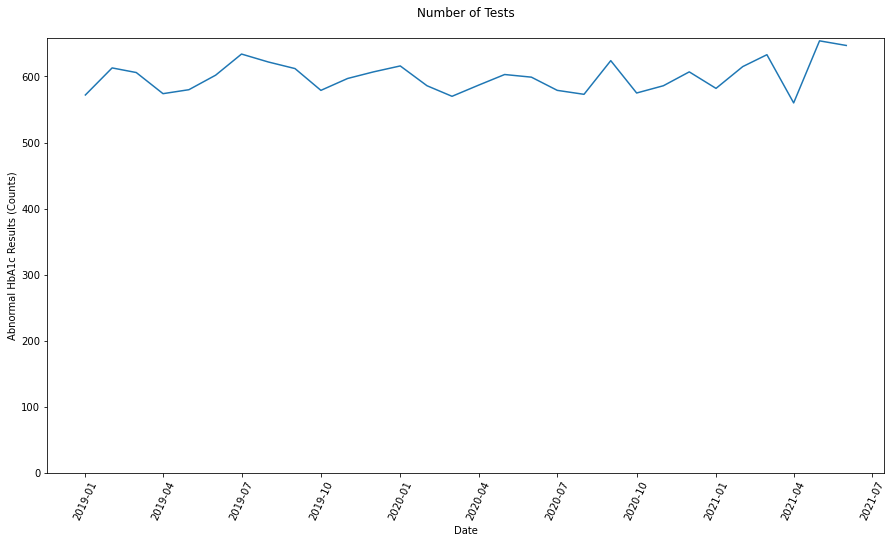

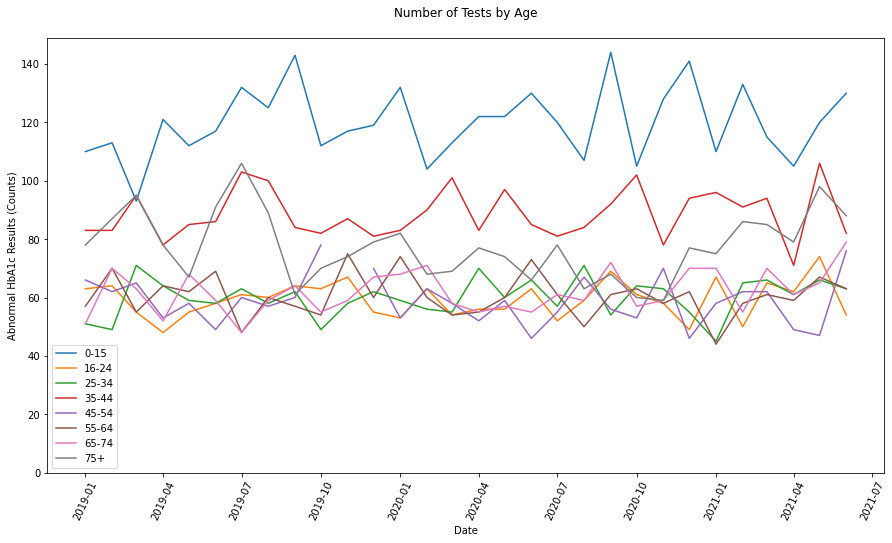

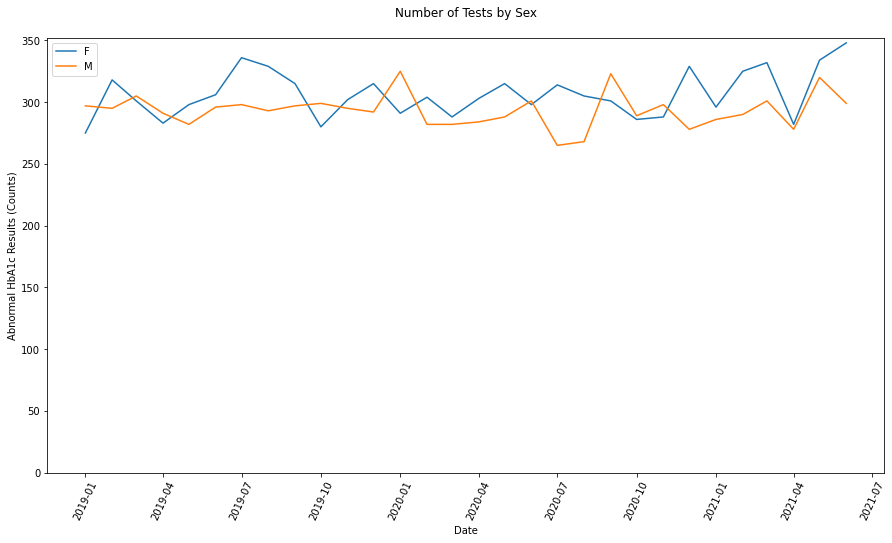

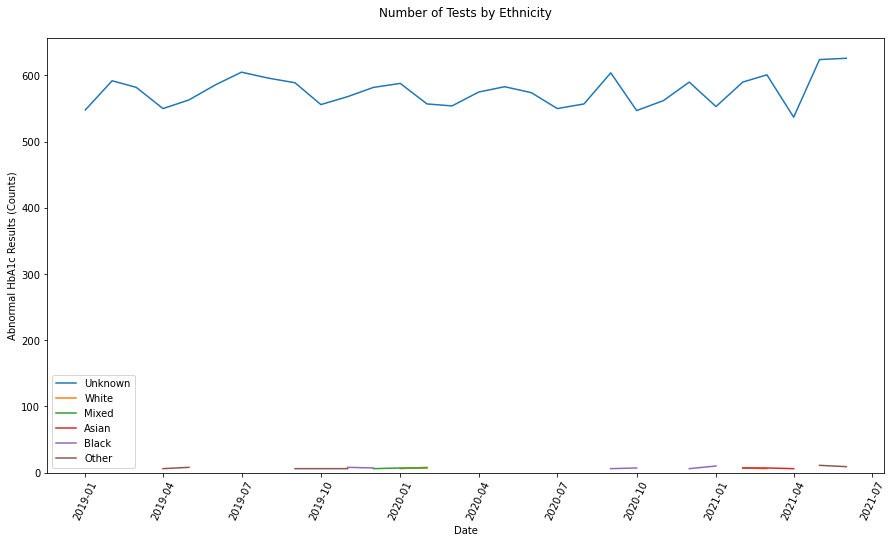

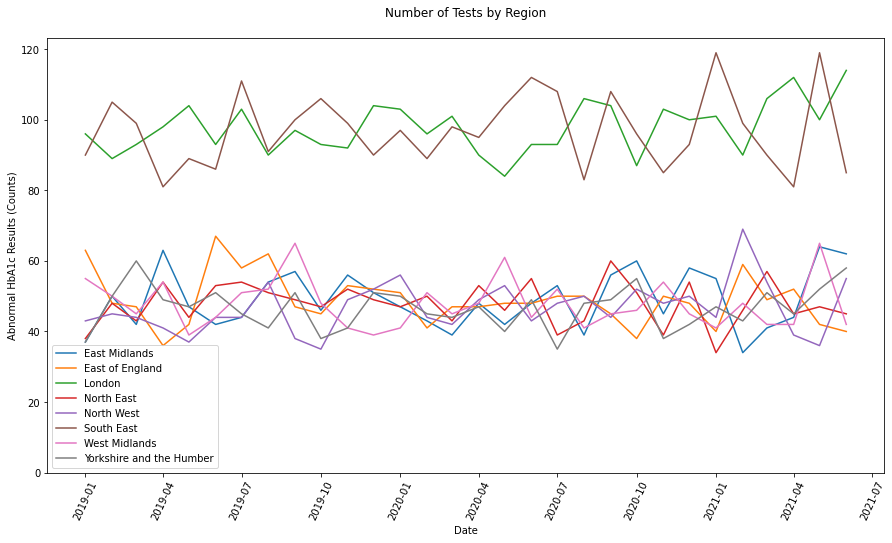

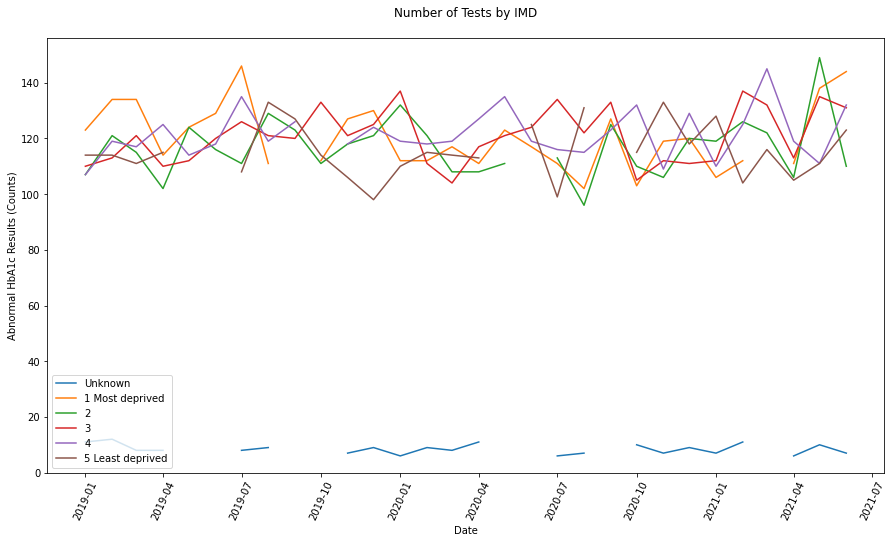

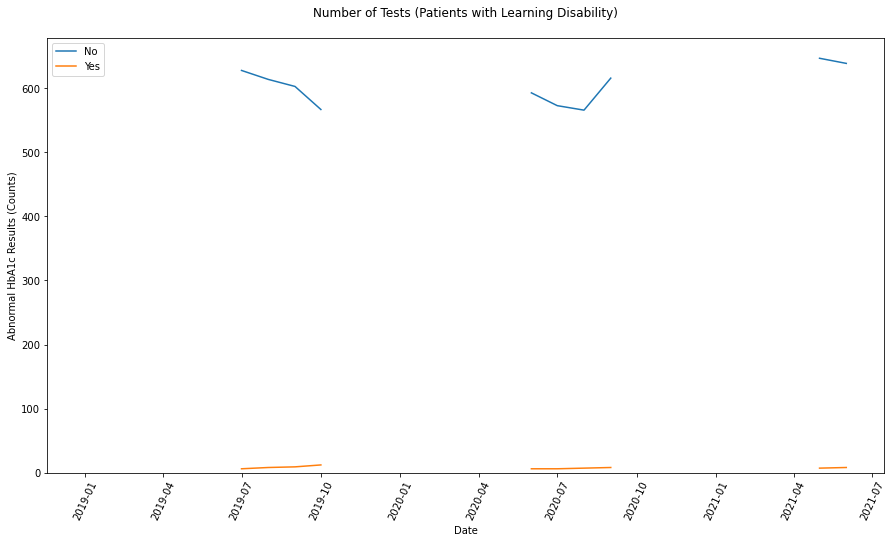

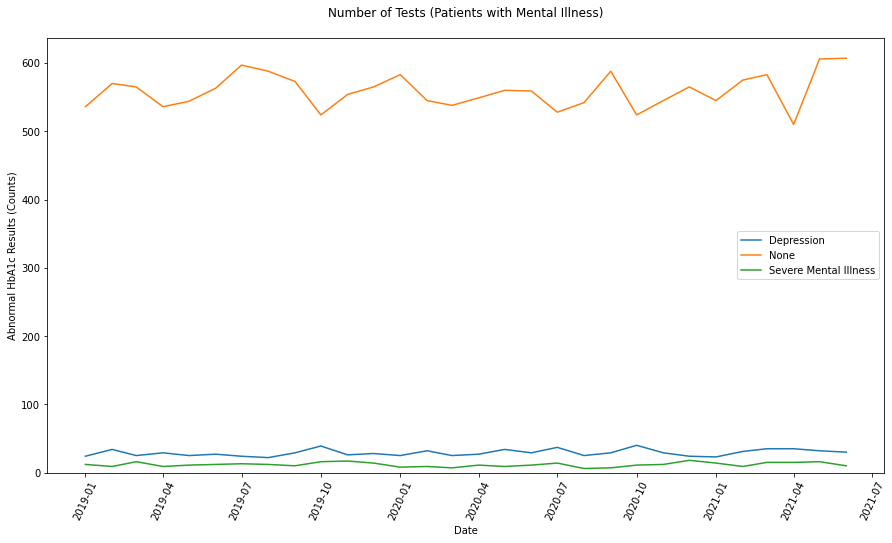

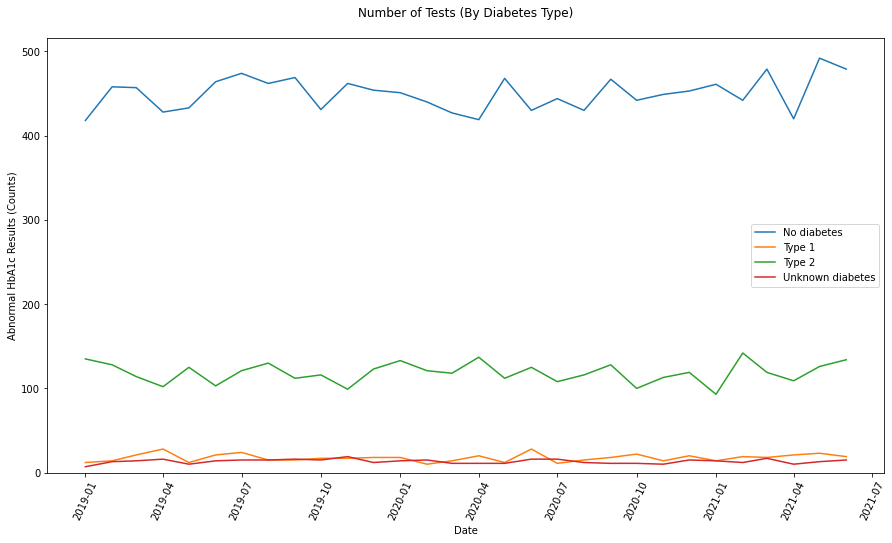

In [28]:
# Population
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Number of Tests',
             'population', df_pop, y_min, y_max)

# Age
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Age',
             'age_group', df_age.loc[df_age.age_group != 'missing'],
             y_min, y_max)

# Sex
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Sex',
             'sex', df_sex.loc[df_sex.sex.isin(['F','M'])], y_min, y_max)

# Ethnicity
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Ethnicity',
             'ethnicity', df_eth, y_min, y_max)

# Region
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Region',
             'region', df_region, y_min, y_max)

# IMD
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by IMD',
             'imd', df_imd, y_min, y_max)

# Learning Disability
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Number of Tests (Patients with Learning Disability)',
             'learning_disability', df_ld, y_min, y_max)

# Mental Illness
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Number of Tests (Patients with Mental Illness)',
             'mental_illness', df_mi, y_min, y_max)

# Diabetes Type
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Number of Tests (By Diabetes Type)',
             'diabetes_type', df_dm, y_min, y_max)

## Count of All Tests

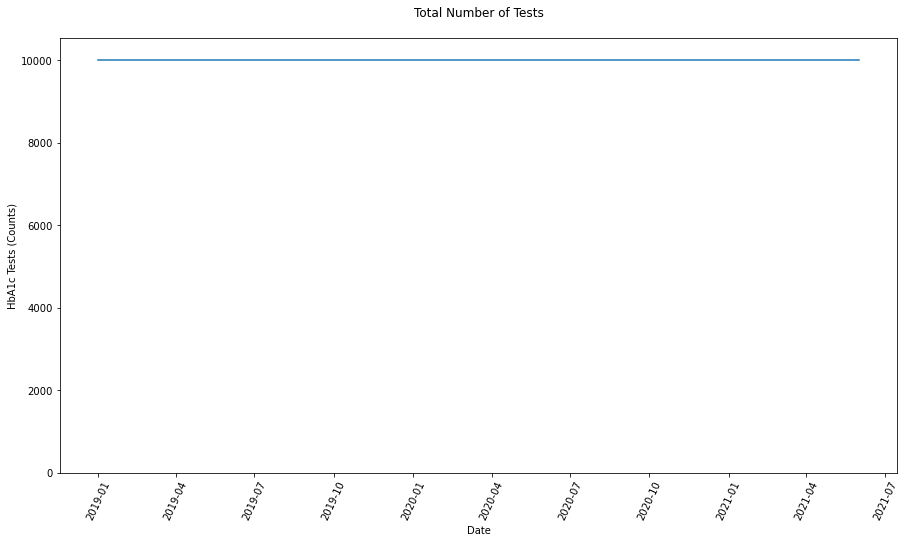

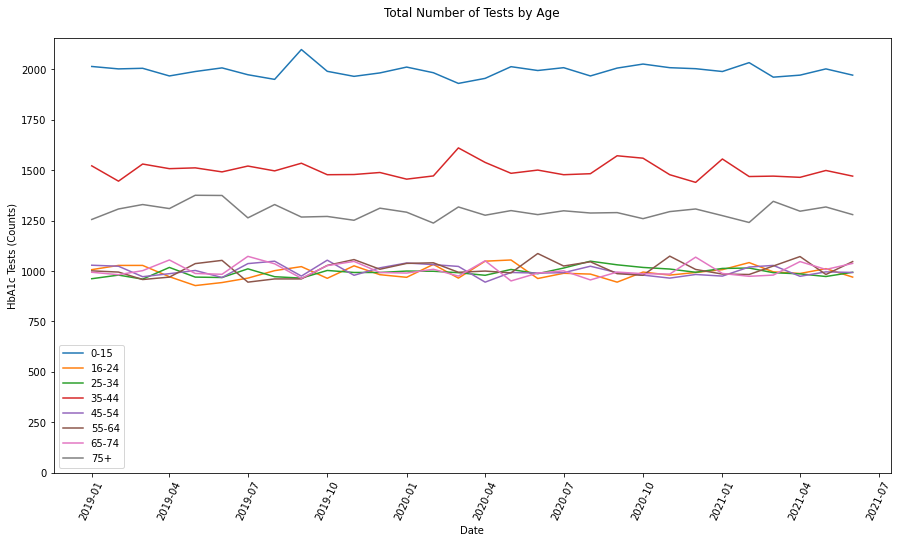

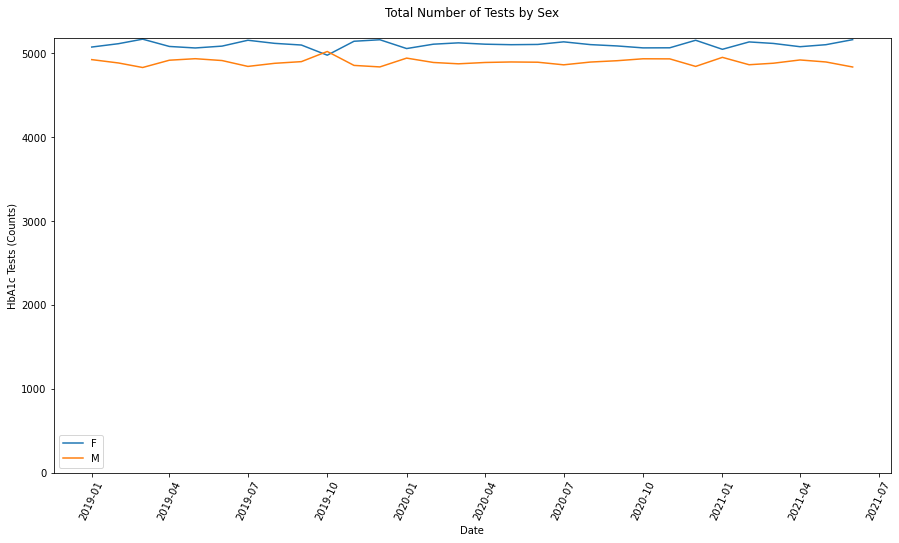

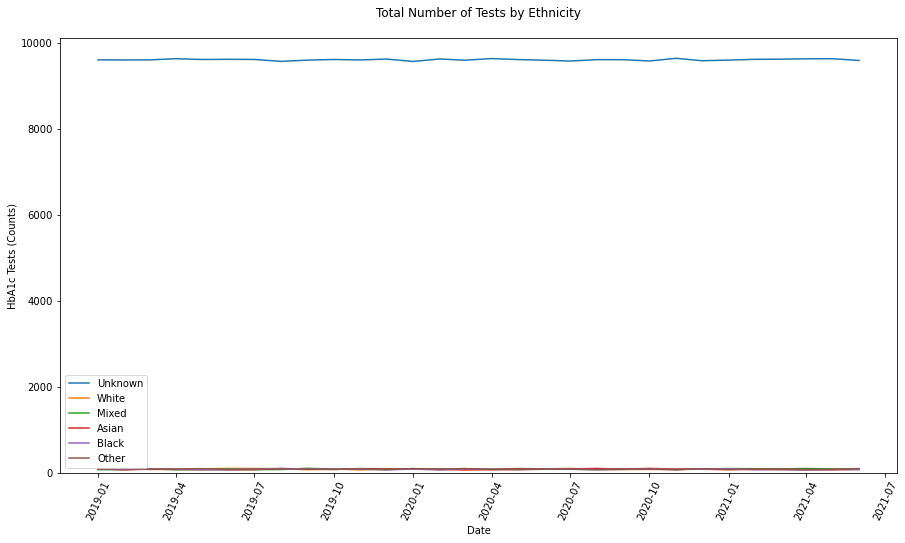

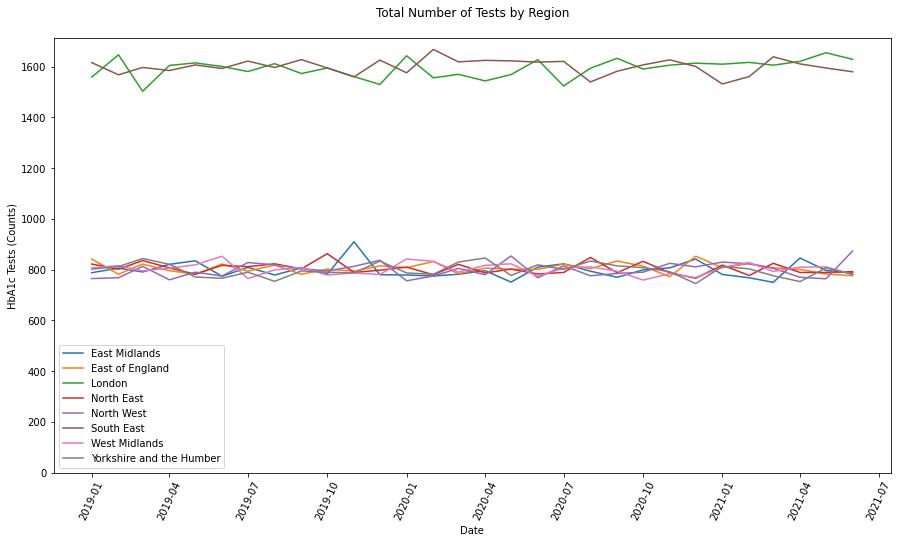

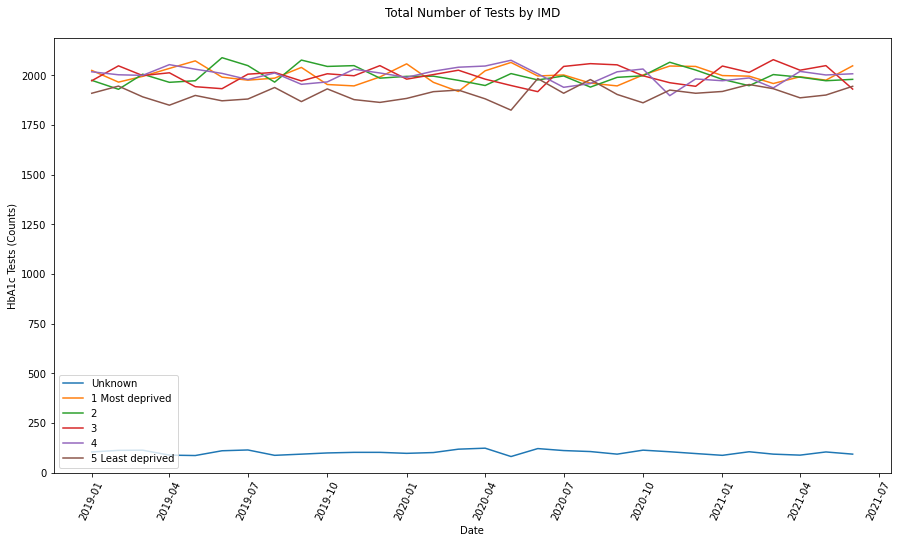

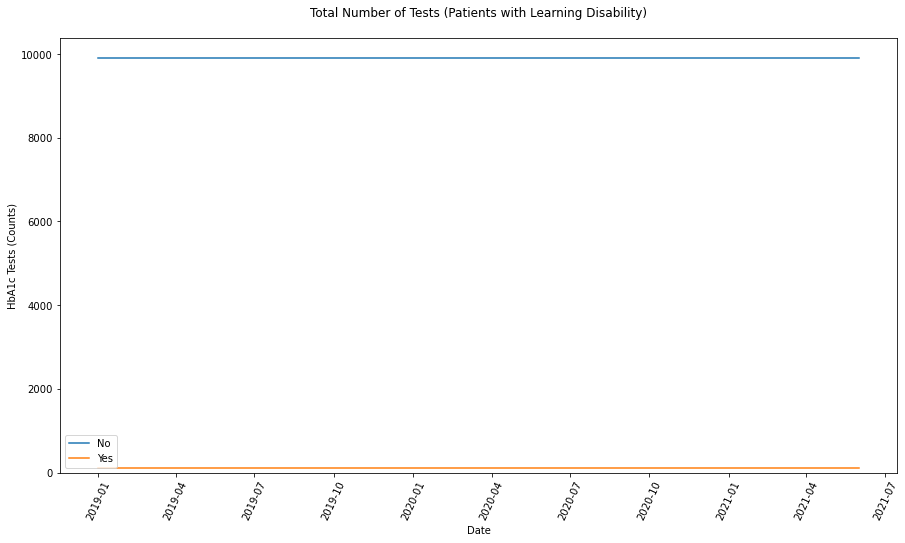

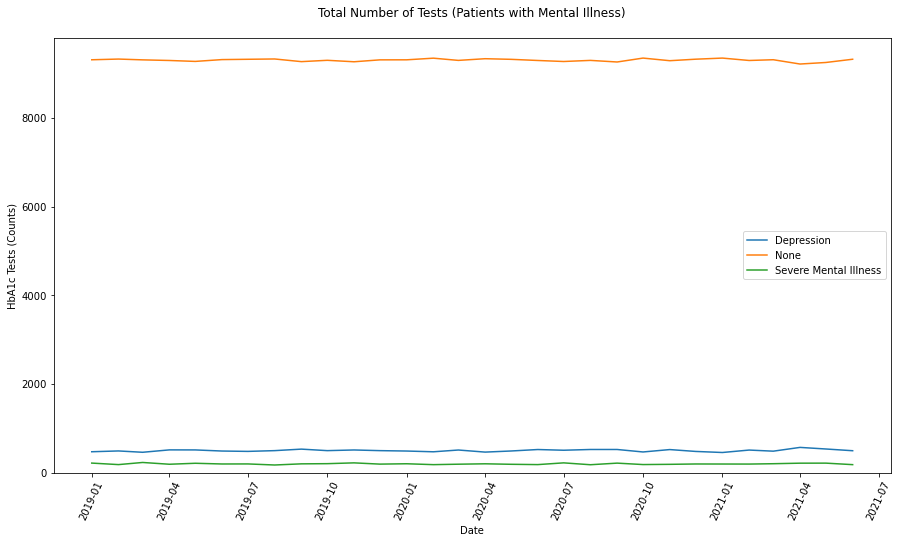

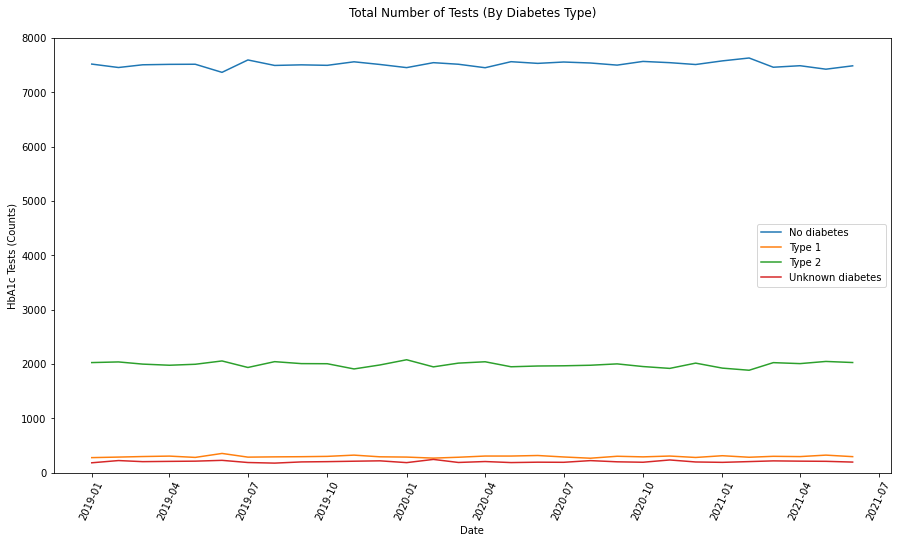

In [29]:
# Population
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests',
             'population', df_pop, y_min, y_max)

# Age
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests by Age',
             'age_group', df_age.loc[df_age.age_group != 'missing'],
             y_min, y_max)

# Sex
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests by Sex',
             'sex', df_sex.loc[df_sex.sex.isin(['F','M'])], y_min, y_max)

# Ethnicity
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests by Ethnicity',
             'ethnicity', df_eth, y_min, y_max)

# Region
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests by Region',
             'region', df_region, y_min, y_max)

# IMD
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests by IMD',
             'imd', df_imd, y_min, y_max)

# Learning Disability
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests (Patients with Learning Disability)',
             'learning_disability', df_ld, y_min, y_max)

# Mental Illness
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests (Patients with Mental Illness)',
             'mental_illness', df_mi, y_min, y_max)

# Diabetes Type
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests (By Diabetes Type)',
             'diabetes_type', df_dm, y_min, y_max)

## Percentage of Abnormal Results of All Tests

In [30]:
pct_min = 0
pct_max = 60

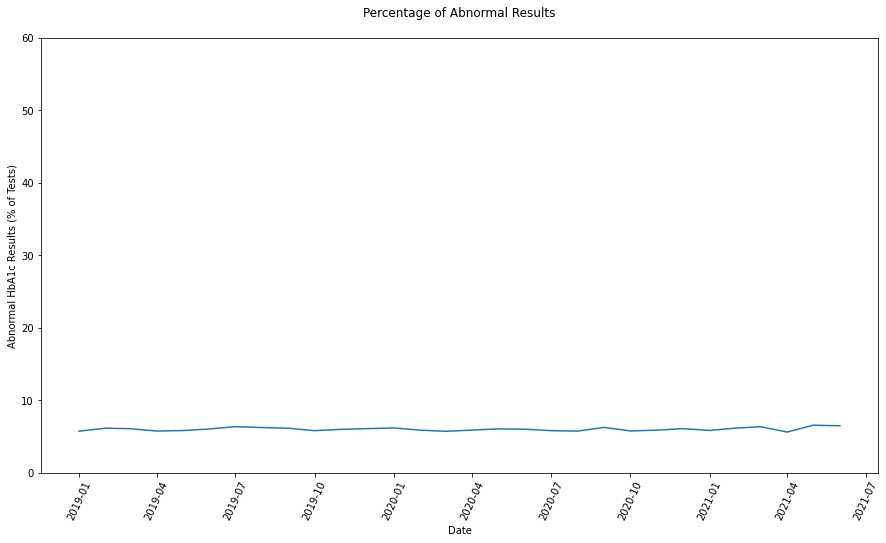

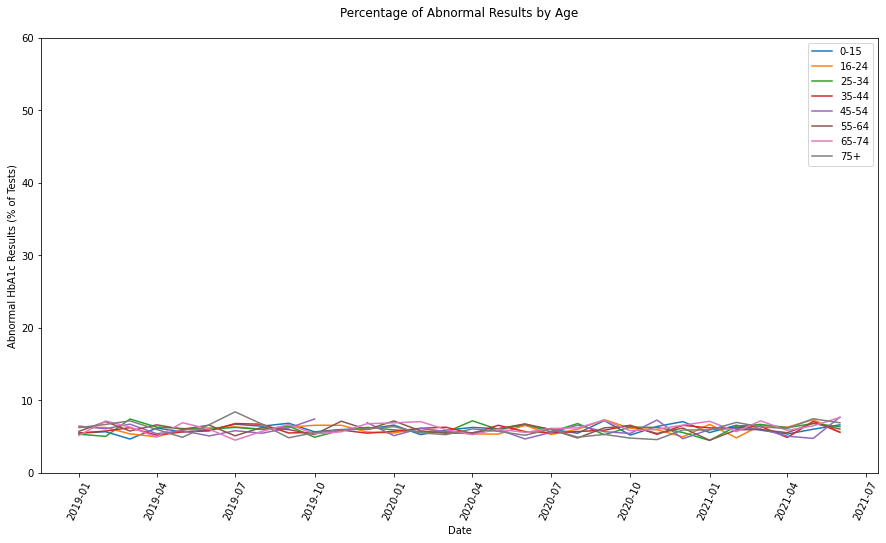

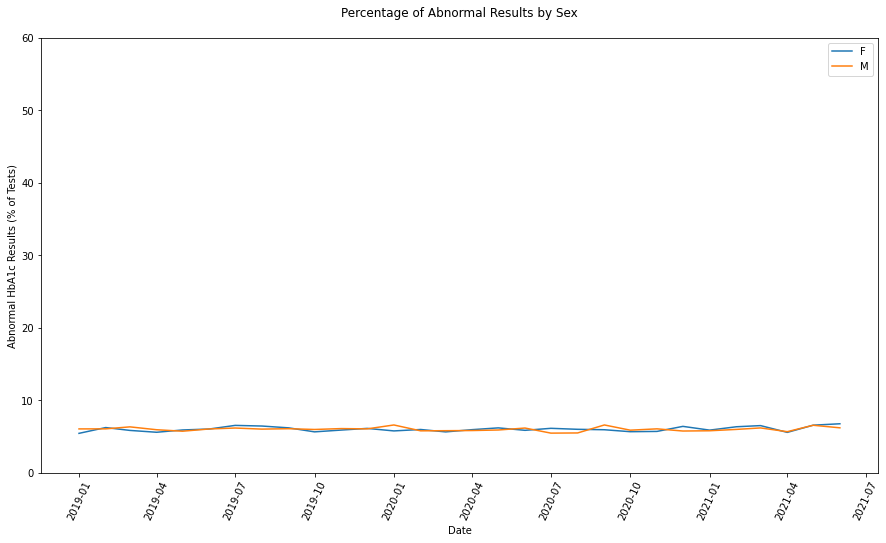

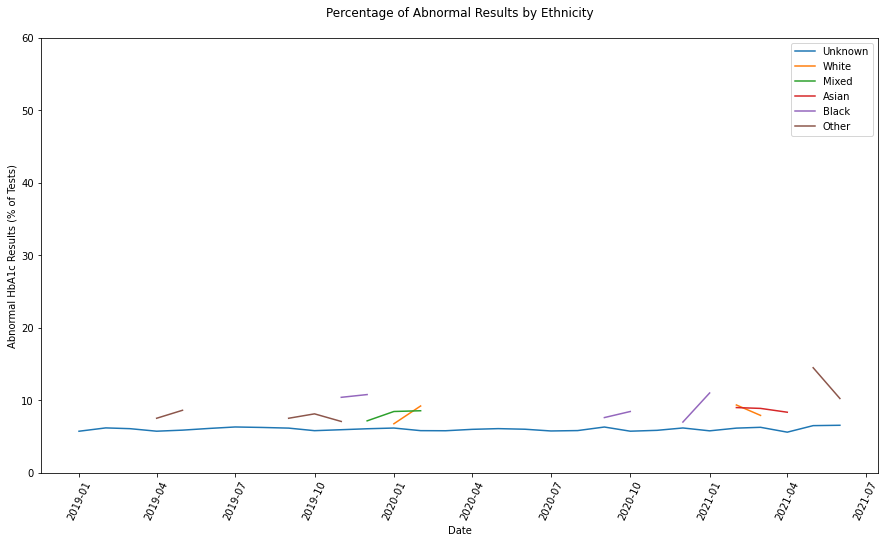

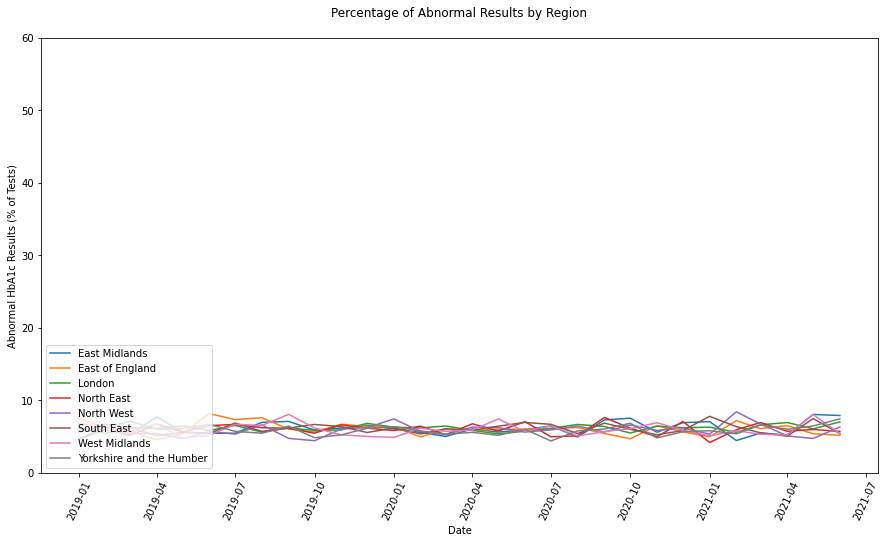

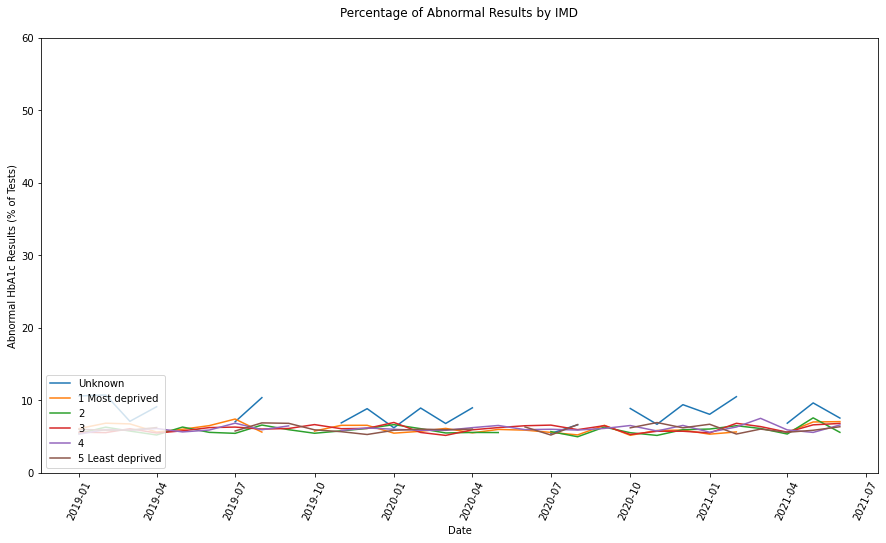

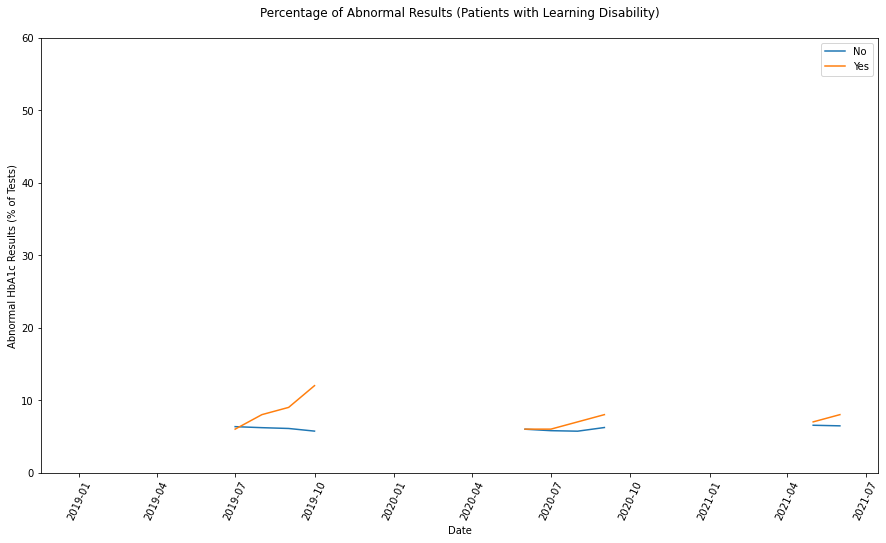

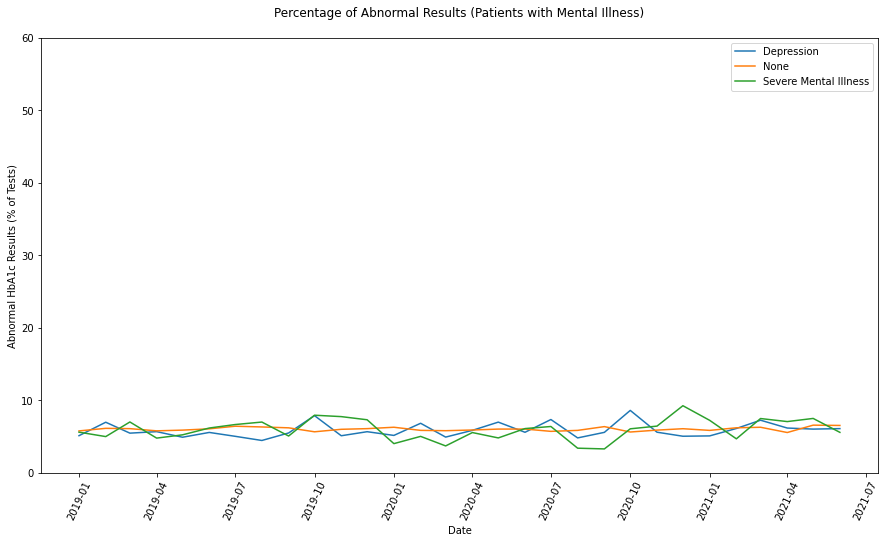

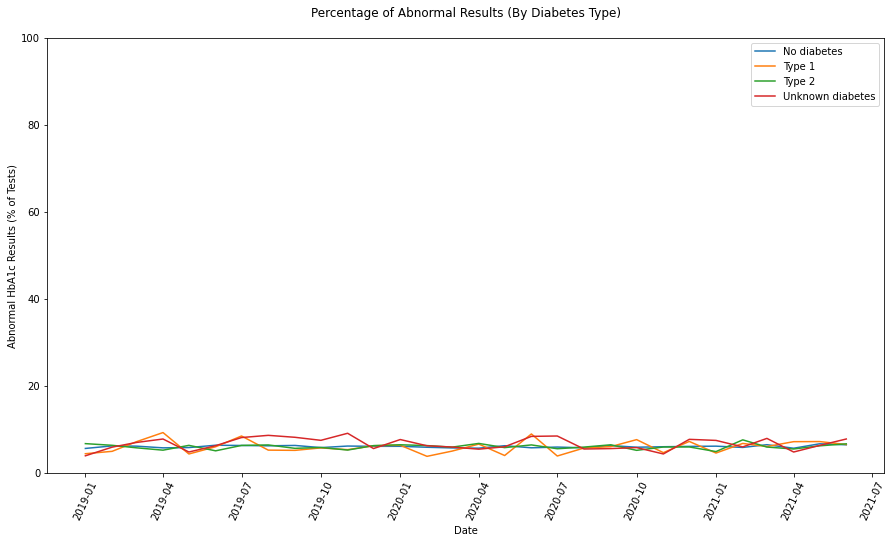

In [32]:
# Population
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results',
             'population', df_pop, pct_min, pct_max)

# Age
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Age',
             'age_group', df_age.loc[df_age.age_group != 'missing'], 
             pct_min, pct_max)

# Sex
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Sex',
             'sex', df_sex.loc[df_sex.sex.isin(['F','M'])], pct_min, pct_max)

# Ethnicity
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Ethnicity',
             'ethnicity', df_eth, pct_min, pct_max)

# Region
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Region',
             'region', df_region, pct_min, pct_max)

# IMD
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by IMD',
             'imd', df_imd, pct_min, pct_max)

# Learning Disability
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results (Patients with Learning Disability)',
             'learning_disability', df_ld, pct_min, pct_max)

# Mental Illness
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results (Patients with Mental Illness)',
             'mental_illness', df_mi, pct_min, pct_max)

# Diabetes Type
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results (By Diabetes Type)',
             'diabetes_type', df_dm, pct_min, 100)

## Tables

In [33]:
measures = ['hba1c_abnormal', 'population', 'pct']

# Population
display(df_pop[['date'] + measures])

# Age
display(df_age.loc[~df_age['age_group'].isin(['missing'])
                  ][['date', 'age_group'] + measures])

# Sex
display(df_sex.loc[df_sex['sex'].isin(['F','M'])][['date', 'sex'] + measures])

# Ethnicity
display(df_eth[['date', 'ethnicity'] + measures])

# Region
display(df_region[['date', 'region'] + measures])

# IMD
display(df_imd[['date', 'imd'] + measures])

# LD
display(df_ld[['date', 'learning_disability'] + measures])

# Mental Illness
display(df_mi[['date', 'mental_illness'] + measures])

# Diabetes Type
display(df_dm[['date', 'diabetes_type'] + measures])

date  hba1c_abnormal  population   pct
0  2019-01-01           572.0       10000  5.72
1  2019-02-01           613.0       10000  6.13
2  2019-03-01           606.0       10000  6.06
3  2019-04-01           574.0       10000  5.74
4  2019-05-01           580.0       10000  5.80
5  2019-06-01           602.0       10000  6.02
6  2019-07-01           634.0       10000  6.34
7  2019-08-01           622.0       10000  6.22
8  2019-09-01           612.0       10000  6.12
9  2019-10-01           579.0       10000  5.79
10 2019-11-01           597.0       10000  5.97
11 2019-12-01           607.0       10000  6.07
12 2020-01-01           616.0       10000  6.16
13 2020-02-01           586.0       10000  5.86
14 2020-03-01           570.0       10000  5.70
15 2020-04-01           587.0       10000  5.87
16 2020-05-01           603.0       10000  6.03
17 2020-06-01           599.0       10000  5.99
18 2020-07-01           579.0       10000  5.79
19 2020-08-01           573.0       10000  5.73
20 2020-09-01           624.0       10000  6.24
21 2020-10-01           575.0       10000  5.75
22 2020-11-01           586.0       10000  5.86
23 2020-12-01           607.0       10000  6.07
24 2021-01-01           582.0       10000  5.82
25 2021-02-01           615.0       10000  6.15
26 2021-03-01           633.0       10000  6.33
27 2021-04-01           560.0       10000  5.60
28 2021-05-01           654.0       10000  6.54
29 2021-06-01           647.0       10000  6.47

date age_group  hba1c_abnormal  population       pct
0   2019-01-01      0-15           110.0        2015  5.459057
1   2019-01-01     16-24            63.0        1007  6.256207
2   2019-01-01     25-34            51.0         962  5.301455
3   2019-01-01     35-44            83.0        1522  5.453351
4   2019-01-01     45-54            66.0        1029  6.413994
5   2019-01-01     55-64            57.0        1001  5.694306
6   2019-01-01     65-74            51.0         994  5.130785
7   2019-01-01       75+            78.0        1256  6.210191
9   2019-02-01      0-15           113.0        2003  5.641538
10  2019-02-01     16-24            64.0        1028  6.225681
11  2019-02-01     25-34            49.0         980  5.000000
12  2019-02-01     35-44            83.0        1446  5.739972
13  2019-02-01     45-54            62.0        1024  6.054688
14  2019-02-01     55-64            70.0         995  7.035176
15  2019-02-01     65-74            70.0         982  7.128310
16  2019-02-01       75+            87.0        1308  6.651376
18  2019-03-01      0-15            93.0        2006  4.636092
19  2019-03-01     16-24            55.0        1028  5.350195
20  2019-03-01     25-34            71.0         960  7.395833
21  2019-03-01     35-44            95.0        1531  6.205095
22  2019-03-01     45-54            65.0         972  6.687243
23  2019-03-01     55-64            55.0         958  5.741127
24  2019-03-01     65-74            63.0        1002  6.287425
25  2019-03-01       75+            95.0        1330  7.142857
27  2019-04-01      0-15           121.0        1968  6.148374
28  2019-04-01     16-24            48.0         972  4.938272
29  2019-04-01     25-34            64.0        1018  6.286837
30  2019-04-01     35-44            78.0        1508  5.172414
31  2019-04-01     45-54            53.0         987  5.369807
32  2019-04-01     55-64            64.0         970  6.597938
33  2019-04-01     65-74            52.0        1055  4.928910
34  2019-04-01       75+            78.0        1310  5.954198
36  2019-05-01      0-15           112.0        1990  5.628141
37  2019-05-01     16-24            55.0         928  5.926724
38  2019-05-01     25-34            59.0         970  6.082474
39  2019-05-01     35-44            85.0        1512  5.621693
40  2019-05-01     45-54            58.0        1003  5.782652
41  2019-05-01     55-64            62.0        1037  5.978785
42  2019-05-01     65-74            68.0         988  6.882591
43  2019-05-01       75+            67.0        1376  4.869186
45  2019-06-01      0-15           117.0        2008  5.826693
46  2019-06-01     16-24            58.0         943  6.150583
47  2019-06-01     25-34            58.0         968  5.991736
48  2019-06-01     35-44            86.0        1492  5.764075
49  2019-06-01     45-54            49.0         968  5.061983
50  2019-06-01     55-64            69.0        1053  6.552707
51  2019-06-01     65-74            59.0         984  5.995935
52  2019-06-01       75+            91.0        1375  6.618182
54  2019-07-01      0-15           132.0        1974  6.686930
55  2019-07-01     16-24            61.0         965  6.321244
56  2019-07-01     25-34            63.0        1011  6.231454
57  2019-07-01     35-44           103.0        1521  6.771861
58  2019-07-01     45-54            60.0        1037  5.785921
59  2019-07-01     55-64            48.0         945  5.079365
60  2019-07-01     65-74            48.0        1073  4.473439
61  2019-07-01       75+           106.0        1264  8.386076
63  2019-08-01      0-15           125.0        1951  6.406971
64  2019-08-01     16-24            60.0        1002  5.988024
65  2019-08-01     25-34            58.0         972  5.967078
66  2019-08-01     35-44           100.0        1497  6.680027
67  2019-08-01     45-54            57.0        1049  5.433746
68  2019-08-01     55-64            60.0         961  6.243496
69  2019-08-01     65-74            59.0 

date sex  hba1c_abnormal  population       pct
0  2019-01-01   F           275.0        5075  5.418719
1  2019-01-01   M           297.0        4925  6.030457
2  2019-02-01   F           318.0        5115  6.217009
3  2019-02-01   M           295.0        4885  6.038895
4  2019-03-01   F           301.0        5169  5.823177
5  2019-03-01   M           305.0        4831  6.313393
6  2019-04-01   F           283.0        5082  5.568674
7  2019-04-01   M           291.0        4918  5.917039
8  2019-05-01   F           298.0        5064  5.884676
9  2019-05-01   M           282.0        4936  5.713128
10 2019-06-01   F           306.0        5086  6.016516
11 2019-06-01   M           296.0        4914  6.023606
12 2019-07-01   F           336.0        5156  6.516680
13 2019-07-01   M           298.0        4844  6.151941
14 2019-08-01   F           329.0        5119  6.427037
15 2019-08-01   M           293.0        4881  6.002868
16 2019-09-01   F           315.0        5099  6.177682
17 2019-09-01   M           297.0        4901  6.059988
18 2019-10-01   F           280.0        4978  5.624749
19 2019-10-01   M           299.0        5022  5.953803
20 2019-11-01   F           302.0        5144  5.870918
21 2019-11-01   M           295.0        4856  6.074959
22 2019-12-01   F           315.0        5162  6.102286
23 2019-12-01   M           292.0        4838  6.035552
24 2020-01-01   F           291.0        5057  5.754400
25 2020-01-01   M           325.0        4943  6.574954
26 2020-02-01   F           304.0        5109  5.950284
27 2020-02-01   M           282.0        4891  5.765692
28 2020-03-01   F           288.0        5125  5.619512
29 2020-03-01   M           282.0        4875  5.784615
30 2020-04-01   F           303.0        5109  5.930711
31 2020-04-01   M           284.0        4891  5.806584
32 2020-05-01   F           315.0        5103  6.172840
33 2020-05-01   M           288.0        4897  5.881152
34 2020-06-01   F           298.0        5106  5.836271
35 2020-06-01   M           301.0        4894  6.150388
36 2020-07-01   F           314.0        5137  6.112517
37 2020-07-01   M           265.0        4863  5.449311
38 2020-08-01   F           305.0        5104  5.975705
39 2020-08-01   M           268.0        4896  5.473856
40 2020-09-01   F           301.0        5088  5.915881
41 2020-09-01   M           323.0        4912  6.575733
42 2020-10-01   F           286.0        5065  5.646594
43 2020-10-01   M           289.0        4935  5.856130
44 2020-11-01   F           288.0        5066  5.684959
45 2020-11-01   M           298.0        4934  6.039724
46 2020-12-01   F           329.0        5156  6.380915
47 2020-12-01   M           278.0        4844  5.739059
48 2021-01-01   F           296.0        5048  5.863708
49 2021-01-01   M           286.0        4952  5.775444
50 2021-02-01   F           325.0        5136  6.327882
51 2021-02-01   M           290.0        4864  5.962171
52 2021-03-01   F           332.0        5118  6.486909
53 2021-03-01   M           301.0        4882  6.165506
54 2021-04-01   F           282.0        5079  5.552274
55 2021-04-01   M           278.0        4921  5.649258
56 2021-05-01   F           334.0        5103  6.545170
57 2021-05-01   M           320.0        4897  6.534613
58 2021-06-01   F           348.0        5163  6.740267
59 2021-06-01   M           299.0        4837  6.181517

date ethnicity  hba1c_abnormal  population        pct
0   2019-01-01   Unknown           548.0        9597   5.710118
1   2019-01-01     White             6.0          90   6.666667
2   2019-01-01     Mixed             NaN          69        NaN
3   2019-01-01     Asian             7.0          87   8.045977
4   2019-01-01     Black             NaN          77        NaN
5   2019-01-01     Other             NaN          80        NaN
6   2019-02-01   Unknown           592.0        9595   6.169880
7   2019-02-01     White             NaN          94        NaN
8   2019-02-01     Mixed             7.0          68  10.294118
9   2019-02-01     Asian             NaN          65        NaN
10  2019-02-01     Black             NaN          84        NaN
11  2019-02-01     Other             7.0          94   7.446809
12  2019-03-01   Unknown           582.0        9596   6.065027
13  2019-03-01     White             6.0          74   8.108108
14  2019-03-01     Mixed             NaN          88        NaN
15  2019-03-01     Asian             NaN          82        NaN
16  2019-03-01     Black             NaN          83        NaN
17  2019-03-01     Other             NaN          77        NaN
18  2019-04-01   Unknown           550.0        9624   5.714879
19  2019-04-01     White             NaN          75        NaN
20  2019-04-01     Mixed             NaN          67        NaN
21  2019-04-01     Asian             NaN          76        NaN
22  2019-04-01     Black             7.0          78   8.974359
23  2019-04-01     Other             6.0          80   7.500000
24  2019-05-01   Unknown           563.0        9606   5.860920
25  2019-05-01     White             NaN          89        NaN
26  2019-05-01     Mixed             NaN          73        NaN
27  2019-05-01     Asian             NaN          70        NaN
28  2019-05-01     Black             NaN          69        NaN
29  2019-05-01     Other             8.0          93   8.602151
30  2019-06-01   Unknown           586.0        9610   6.097815
31  2019-06-01     White             6.0          98   6.122449
32  2019-06-01     Mixed             NaN          85        NaN
33  2019-06-01     Asian             NaN          69        NaN
34  2019-06-01     Black             NaN          69        NaN
35  2019-06-01     Other             NaN          69        NaN
36  2019-07-01   Unknown           605.0        9607   6.297491
37  2019-07-01     White             NaN          96        NaN
38  2019-07-01     Mixed             7.0          70  10.000000
39  2019-07-01     Asian             7.0          69  10.144928
40  2019-07-01     Black             NaN          80        NaN
41  2019-07-01     Other             NaN          78        NaN
42  2019-08-01   Unknown           596.0        9562   6.233006
43  2019-08-01     White             8.0          91   8.791209
44  2019-08-01     Mixed             NaN          71        NaN
45  2019-08-01     Asian             NaN          94        NaN
46  2019-08-01     Black             6.0          97   6.185567
47  2019-08-01     Other             NaN          85        NaN
48  2019-09-01   Unknown           589.0        9591   6.141174
49  2019-09-01     White             NaN          67        NaN
50  2019-09-01     Mixed             NaN         101        NaN
51  2019-09-01     Asian             7.0          78   8.974359
52  2019-09-01     Black             NaN          83        NaN
53  2019-09-01     Other             6.0          80   7.500000
54  2019-10-01   Unknown           556.0        9606   5.788049
55  2019-10-01     White             NaN          84        NaN
56  2019-10-01     Mixed             NaN          80        NaN
57  2019-10-01     Asian             NaN          76        NaN
58  2019-10-01     Black             NaN          80        NaN
59  2019-10-01     Other             6.0          74   8.108108
60  2019-11-01   Unknown           568.0        9595   5.919750
61  2019-11-01     White             NaN  

date                    region  hba1c_abnormal  population       pct
1   2019-01-01             East Midlands            37.0         788  4.695431
2   2019-01-01           East of England            63.0         842  7.482185
3   2019-01-01                    London            96.0        1559  6.157793
4   2019-01-01                North East            38.0         822  4.622871
5   2019-01-01                North West            43.0         765  5.620915
6   2019-01-01                South East            90.0        1616  5.569307
7   2019-01-01             West Midlands            55.0         807  6.815366
8   2019-01-01  Yorkshire and the Humber            37.0         802  4.613466
10  2019-02-01             East Midlands            50.0         806  6.203474
11  2019-02-01           East of England            48.0         782  6.138107
12  2019-02-01                    London            89.0        1647  5.403764
13  2019-02-01                North East            48.0         802  5.985037
14  2019-02-01                North West            45.0         768  5.859375
15  2019-02-01                South East           105.0        1568  6.696429
16  2019-02-01             West Midlands            50.0         816  6.127451
17  2019-02-01  Yorkshire and the Humber            50.0         812  6.157635
19  2019-03-01             East Midlands            42.0         791  5.309735
20  2019-03-01           East of England            47.0         822  5.717762
21  2019-03-01                    London            93.0        1503  6.187625
22  2019-03-01                North East            43.0         836  5.143541
23  2019-03-01                North West            44.0         813  5.412054
24  2019-03-01                South East            99.0        1597  6.199123
25  2019-03-01             West Midlands            45.0         795  5.660377
26  2019-03-01  Yorkshire and the Humber            60.0         844  7.109005
28  2019-04-01             East Midlands            63.0         821  7.673569
29  2019-04-01           East of England            36.0         796  4.522613
30  2019-04-01                    London            98.0        1605  6.105919
31  2019-04-01                North East            54.0         807  6.691450
32  2019-04-01                North West            41.0         760  5.394737
33  2019-04-01                South East            81.0        1585  5.110410
34  2019-04-01             West Midlands            54.0         806  6.699752
35  2019-04-01  Yorkshire and the Humber            49.0         821  5.968331
37  2019-05-01             East Midlands            47.0         835  5.628743
38  2019-05-01           East of England            42.0         782  5.370844
39  2019-05-01                    London           104.0        1615  6.439628
40  2019-05-01                North East            44.0         782  5.626598
41  2019-05-01                North West            37.0         790  4.683544
42  2019-05-01                South East            89.0        1607  5.538270
43  2019-05-01             West Midlands            39.0         819  4.761905
44  2019-05-01  Yorkshire and the Humber            47.0         771  6.095979
46  2019-06-01             East Midlands            42.0         774  5.426357
47  2019-06-01           East of England            67.0         822  8.150852
48  2019-06-01                    London            93.0        1601  5.808869
49  2019-06-01                North East            53.0         817  6.487148
50  2019-06-01                North West            44.0         775  5.677419
51  2019-06-01                South East            86.0        1593  5.398619
52  2019-06-01             West Midlands            44.0         853  5.158265
53  2019-06-01  Yorkshire and the Humber            51.0         766  6.657963
55  2019-07-01             East Midlands            44.0         809  5.438813
56  2019-07-01           East of England            58.0    

date               imd  hba1c_abnormal  population        pct
0   2019-01-01           Unknown            11.0         104  10.576923
1   2019-01-01   1 Most deprived           123.0        2024   6.077075
2   2019-01-01                 2           107.0        1974   5.420466
3   2019-01-01                 3           110.0        1972   5.578093
4   2019-01-01                 4           107.0        2017   5.304908
5   2019-01-01  5 Least deprived           114.0        1909   5.971713
6   2019-02-01           Unknown            12.0         112  10.714286
7   2019-02-01   1 Most deprived           134.0        1965   6.819338
8   2019-02-01                 2           121.0        1929   6.272680
9   2019-02-01                 3           113.0        2047   5.520274
10  2019-02-01                 4           119.0        2002   5.944056
11  2019-02-01  5 Least deprived           114.0        1945   5.861183
12  2019-03-01           Unknown             8.0         113   7.079646
13  2019-03-01   1 Most deprived           134.0        1994   6.720160
14  2019-03-01                 2           115.0        2005   5.735661
15  2019-03-01                 3           121.0        1998   6.056056
16  2019-03-01                 4           117.0        1999   5.852926
17  2019-03-01  5 Least deprived           111.0        1891   5.869910
18  2019-04-01           Unknown             8.0          88   9.090909
19  2019-04-01   1 Most deprived           114.0        2034   5.604720
20  2019-04-01                 2           102.0        1964   5.193483
21  2019-04-01                 3           110.0        2012   5.467197
22  2019-04-01                 4           125.0        2053   6.088651
23  2019-04-01  5 Least deprived           115.0        1849   6.219578
24  2019-05-01           Unknown             NaN          86        NaN
25  2019-05-01   1 Most deprived           124.0        2072   5.984556
26  2019-05-01                 2           124.0        1972   6.288032
27  2019-05-01                 3           112.0        1942   5.767250
28  2019-05-01                 4           114.0        2030   5.615764
29  2019-05-01  5 Least deprived             NaN        1898        NaN
30  2019-06-01           Unknown             NaN         110        NaN
31  2019-06-01   1 Most deprived           129.0        1990   6.482412
32  2019-06-01                 2           116.0        2088   5.555556
33  2019-06-01                 3           120.0        1932   6.211180
34  2019-06-01                 4           118.0        2009   5.873569
35  2019-06-01  5 Least deprived             NaN        1871        NaN
36  2019-07-01           Unknown             8.0         114   7.017544
37  2019-07-01   1 Most deprived           146.0        1975   7.392405
38  2019-07-01                 2           111.0        2048   5.419922
39  2019-07-01                 3           126.0        2005   6.284289
40  2019-07-01                 4           135.0        1978   6.825076
41  2019-07-01  5 Least deprived           108.0        1880   5.744681
42  2019-08-01           Unknown             9.0          87  10.344828
43  2019-08-01   1 Most deprived           111.0        1985   5.591940
44  2019-08-01                 2           129.0        1965   6.564885
45  2019-08-01                 3           121.0        2014   6.007944
46  2019-08-01                 4           119.0        2011   5.917454
47  2019-08-01  5 Least deprived           133.0        1938   6.862745
48  2019-09-01           Unknown             NaN          93        NaN
49  2019-09-01   1 Most deprived             NaN        2039        NaN
50  2019-09-01                 2           123.0        2076   5.924855
51  2019-09-01                 3           120.0        1971   6.088280
52  2019-09-01                 4           126.0        1954   6.448311
53  2019-09-01  5 Least deprived           127.0        1867   6.802357
54  2019-10-01           Unknown             NaN  

date learning_disability  hba1c_abnormal  population        pct
0  2019-01-01                  No           566.0        9900   5.717172
1  2019-01-01                 Yes             6.0         100   6.000000
2  2019-02-01                  No             NaN        9900        NaN
3  2019-02-01                 Yes             NaN         100        NaN
4  2019-03-01                  No           599.0        9900   6.050505
5  2019-03-01                 Yes             7.0         100   7.000000
6  2019-04-01                  No             NaN        9900        NaN
7  2019-04-01                 Yes             NaN         100        NaN
8  2019-05-01                  No           574.0        9900   5.797980
9  2019-05-01                 Yes             6.0         100   6.000000
10 2019-06-01                  No             NaN        9900        NaN
11 2019-06-01                 Yes             NaN         100        NaN
12 2019-07-01                  No           628.0        9900   6.343434
13 2019-07-01                 Yes             6.0         100   6.000000
14 2019-08-01                  No           614.0        9900   6.202020
15 2019-08-01                 Yes             8.0         100   8.000000
16 2019-09-01                  No           603.0        9900   6.090909
17 2019-09-01                 Yes             9.0         100   9.000000
18 2019-10-01                  No           567.0        9900   5.727273
19 2019-10-01                 Yes            12.0         100  12.000000
20 2019-11-01                  No             NaN        9900        NaN
21 2019-11-01                 Yes             NaN         100        NaN
22 2019-12-01                  No             NaN        9900        NaN
23 2019-12-01                 Yes             NaN         100        NaN
24 2020-01-01                  No           609.0        9900   6.151515
25 2020-01-01                 Yes             7.0         100   7.000000
26 2020-02-01                  No             NaN        9900        NaN
27 2020-02-01                 Yes             NaN         100        NaN
28 2020-03-01                  No             NaN        9900        NaN
29 2020-03-01                 Yes             NaN         100        NaN
30 2020-04-01                  No             NaN        9900        NaN
31 2020-04-01                 Yes             NaN         100        NaN
32 2020-05-01                  No             NaN        9900        NaN
33 2020-05-01                 Yes             NaN         100        NaN
34 2020-06-01                  No           593.0        9900   5.989899
35 2020-06-01                 Yes             6.0         100   6.000000
36 2020-07-01                  No           573.0        9900   5.787879
37 2020-07-01                 Yes             6.0         100   6.000000
38 2020-08-01                  No           566.0        9900   5.717172
39 2020-08-01                 Yes             7.0         100   7.000000
40 2020-09-01                  No           616.0        9900   6.222222
41 2020-09-01                 Yes             8.0         100   8.000000
42 2020-10-01                  No             NaN        9900        NaN
43 2020-10-01                 Yes             NaN         100        NaN
44 2020-11-01                  No             NaN        9900        NaN
45 2020-11-01                 Yes             NaN         100        NaN
46 2020-12-01                  No             NaN        9900        NaN
47 2020-12-01                 Yes             NaN         100        NaN
48 2021-01-01                  No             NaN        9900        NaN
49 2021-01-01                 Yes             NaN         100        NaN
50 2021-02-01                  No             NaN        9900        NaN
51 2021-02-01                 Yes             NaN         100        NaN
52 2021-03-01                  No             NaN        9900        NaN
53 2021-03-01                 Yes             NaN         100      

date         mental_illness  hba1c_abnormal  population       pct
0  2019-01-01             Depression            24.0         471  5.095541
1  2019-01-01                   None           536.0        9314  5.754778
2  2019-01-01  Severe Mental Illness            12.0         215  5.581395
3  2019-02-01             Depression            34.0         489  6.952965
4  2019-02-01                   None           570.0        9330  6.109325
5  2019-02-01  Severe Mental Illness             9.0         181  4.972376
6  2019-03-01             Depression            25.0         459  5.446623
7  2019-03-01                   None           565.0        9312  6.067440
8  2019-03-01  Severe Mental Illness            16.0         229  6.986900
9  2019-04-01             Depression            29.0         513  5.653021
10 2019-04-01                   None           536.0        9298  5.764681
11 2019-04-01  Severe Mental Illness             9.0         189  4.761905
12 2019-05-01             Depression            25.0         512  4.882812
13 2019-05-01                   None           544.0        9277  5.863965
14 2019-05-01  Severe Mental Illness            11.0         211  5.213270
15 2019-06-01             Depression            27.0         487  5.544148
16 2019-06-01                   None           563.0        9318  6.042069
17 2019-06-01  Severe Mental Illness            12.0         195  6.153846
18 2019-07-01             Depression            24.0         479  5.010438
19 2019-07-01                   None           597.0        9325  6.402145
20 2019-07-01  Severe Mental Illness            13.0         196  6.632653
21 2019-08-01             Depression            22.0         496  4.435484
22 2019-08-01                   None           588.0        9332  6.300900
23 2019-08-01  Severe Mental Illness            12.0         172  6.976744
24 2019-09-01             Depression            29.0         530  5.471698
25 2019-09-01                   None           573.0        9272  6.179896
26 2019-09-01  Severe Mental Illness            10.0         198  5.050505
27 2019-10-01             Depression            39.0         496  7.862903
28 2019-10-01                   None           524.0        9302  5.633197
29 2019-10-01  Severe Mental Illness            16.0         202  7.920792
30 2019-11-01             Depression            26.0         511  5.088063
31 2019-11-01                   None           554.0        9269  5.976912
32 2019-11-01  Severe Mental Illness            17.0         220  7.727273
33 2019-12-01             Depression            28.0         496  5.645161
34 2019-12-01                   None           565.0        9312  6.067440
35 2019-12-01  Severe Mental Illness            14.0         192  7.291667
36 2020-01-01             Depression            25.0         487  5.133470
37 2020-01-01                   None           583.0        9313  6.260067
38 2020-01-01  Severe Mental Illness             8.0         200  4.000000
39 2020-02-01             Depression            32.0         470  6.808511
40 2020-02-01                   None           545.0        9350  5.828877
41 2020-02-01  Severe Mental Illness             9.0         180  5.000000
42 2020-03-01             Depression            25.0         510  4.901961
43 2020-03-01                   None           538.0        9300  5.784946
44 2020-03-01  Severe Mental Illness             7.0         190  3.684211
45 2020-04-01             Depression            27.0         463  5.831533
46 2020-04-01                   None           549.0        9338  5.879203
47 2020-04-01  Severe Mental Illness            11.0         199  5.527638
48 2020-05-01             Depression            34.0         488  6.967213
49 2020-05-01                   None           560.0        9324  6.006006
50 2020-05-01  Severe Mental Illness             9.0         188  4.787234
51 2020-06-01             Depression            29.0         521  5.566219
52 2020-06-01                   No

date     diabetes_type  hba1c_abnormal  population       pct
0   2019-01-01       No diabetes           418.0        7518  5.559989
1   2019-01-01            Type 1            12.0         276  4.347826
2   2019-01-01            Type 2           135.0        2025  6.666667
3   2019-01-01  Unknown diabetes             7.0         181  3.867403
4   2019-02-01       No diabetes           458.0        7455  6.143528
5   2019-02-01            Type 1            14.0         286  4.895105
6   2019-02-01            Type 2           128.0        2037  6.283751
7   2019-02-01  Unknown diabetes            13.0         222  5.855856
8   2019-03-01       No diabetes           457.0        7505  6.089274
9   2019-03-01            Type 1            21.0         296  7.094595
10  2019-03-01            Type 2           114.0        1997  5.708563
11  2019-03-01  Unknown diabetes            14.0         202  6.930693
12  2019-04-01       No diabetes           428.0        7513  5.696792
13  2019-04-01            Type 1            28.0         304  9.210526
14  2019-04-01            Type 2           102.0        1976  5.161943
15  2019-04-01  Unknown diabetes            16.0         207  7.729469
16  2019-05-01       No diabetes           433.0        7515  5.761810
17  2019-05-01            Type 1            12.0         280  4.285714
18  2019-05-01            Type 2           125.0        1994  6.268806
19  2019-05-01  Unknown diabetes            10.0         211  4.739336
20  2019-06-01       No diabetes           464.0        7366  6.299213
21  2019-06-01            Type 1            21.0         353  5.949008
22  2019-06-01            Type 2           103.0        2055  5.012165
23  2019-06-01  Unknown diabetes            14.0         226  6.194690
24  2019-07-01       No diabetes           474.0        7594  6.241770
25  2019-07-01            Type 1            24.0         285  8.421053
26  2019-07-01            Type 2           121.0        1935  6.253230
27  2019-07-01  Unknown diabetes            15.0         186  8.064516
28  2019-08-01       No diabetes           462.0        7493  6.165755
29  2019-08-01            Type 1            15.0         290  5.172414
30  2019-08-01            Type 2           130.0        2042  6.366308
31  2019-08-01  Unknown diabetes            15.0         175  8.571429
32  2019-09-01       No diabetes           469.0        7504  6.250000
33  2019-09-01            Type 1            15.0         293  5.119454
34  2019-09-01            Type 2           112.0        2006  5.583250
35  2019-09-01  Unknown diabetes            16.0         197  8.121827
36  2019-10-01       No diabetes           431.0        7495  5.750500
37  2019-10-01            Type 1            17.0         299  5.685619
38  2019-10-01            Type 2           116.0        2004  5.788423
39  2019-10-01  Unknown diabetes            15.0         202  7.425743
40  2019-11-01       No diabetes           462.0        7560  6.111111
41  2019-11-01            Type 1            17.0         322  5.279503
42  2019-11-01            Type 2            99.0        1908  5.188679
43  2019-11-01  Unknown diabetes            19.0         210  9.047619
44  2019-12-01       No diabetes           454.0        7511  6.044468
45  2019-12-01            Type 1            18.0         291  6.185567
46  2019-12-01            Type 2           123.0        1981  6.208985
47  2019-12-01  Unknown diabetes            12.0         217  5.529954
48  2020-01-01       No diabetes           451.0        7453  6.051255
49  2020-01-01            Type 1            18.0         286  6.293706
50  2020-01-01            Type 2           133.0        2077  6.403467
51  2020-01-01  Unknown diabetes            14.0         184  7.608696
52  2020-02-01       No diabetes           440.0        7544  5.832450
53  2020-02-01            Type 1            10.0         267  3.745318
54  2020-02-01            Type 2           121.0        1946  6.217883
55  2020-02-01  Unknown diabetes  

________

## Count of Abnormal Results (Patients with Type 1 Diabetes Only)

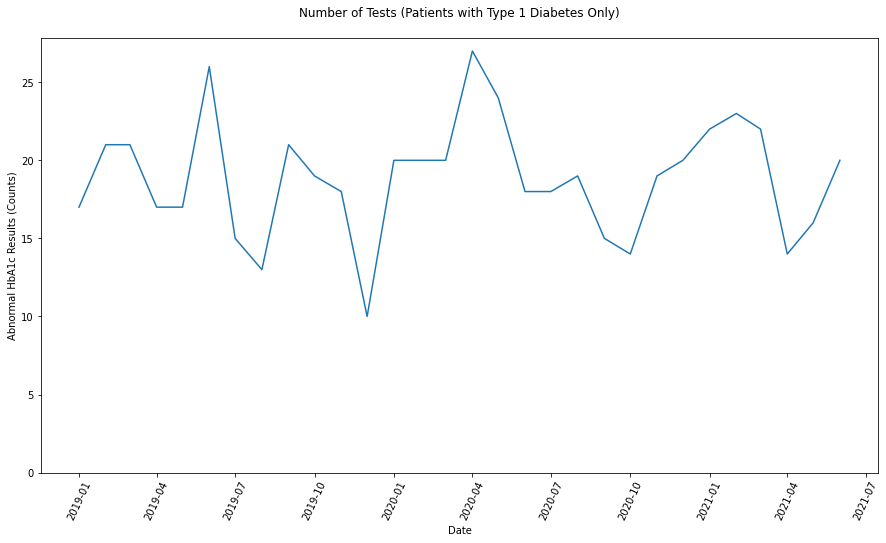

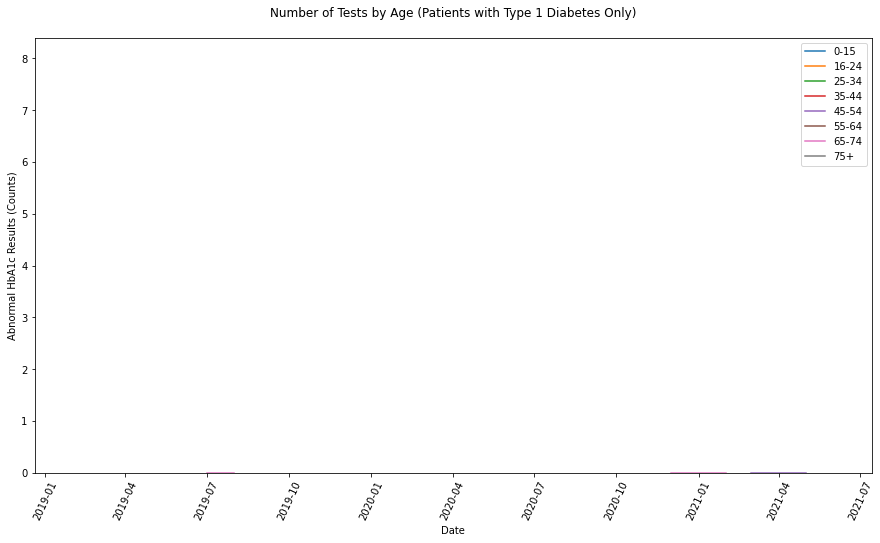

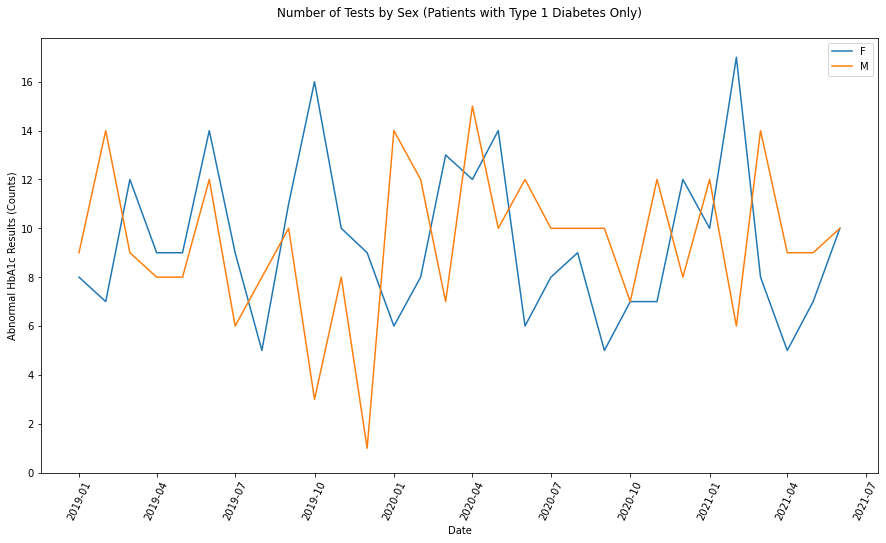

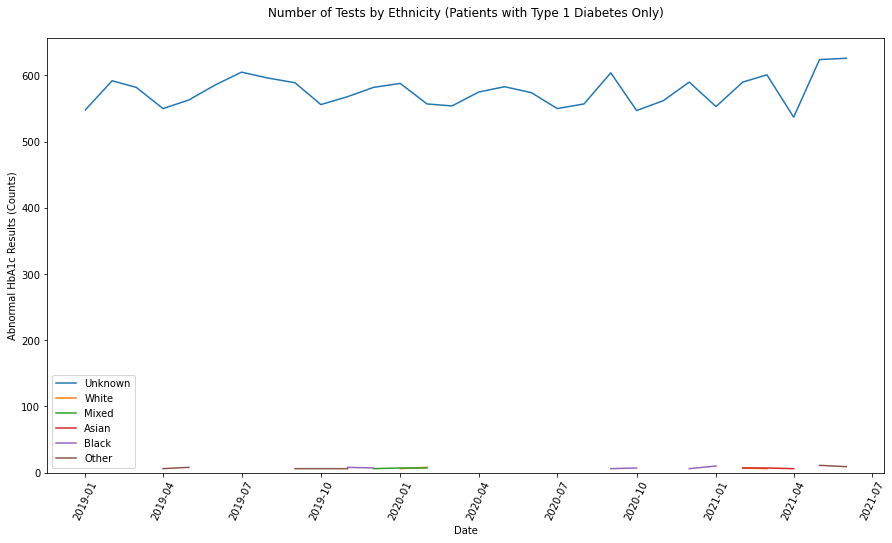

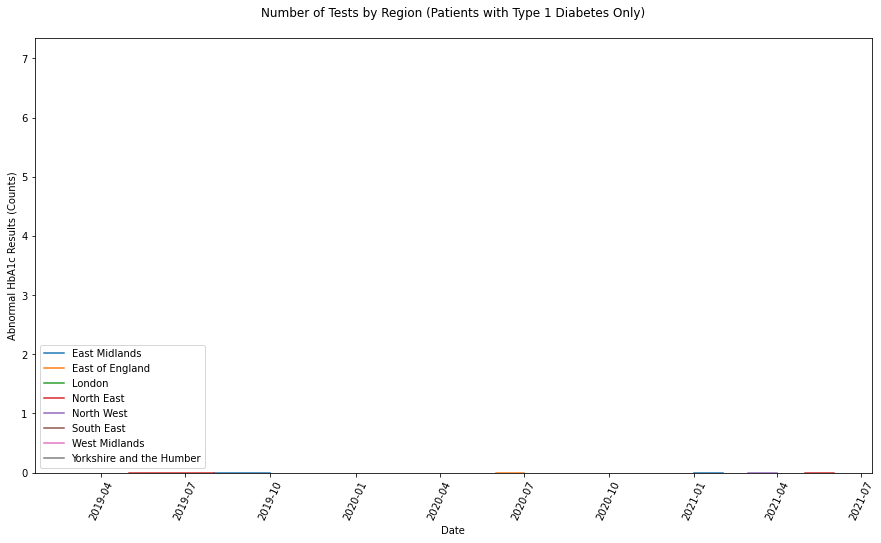

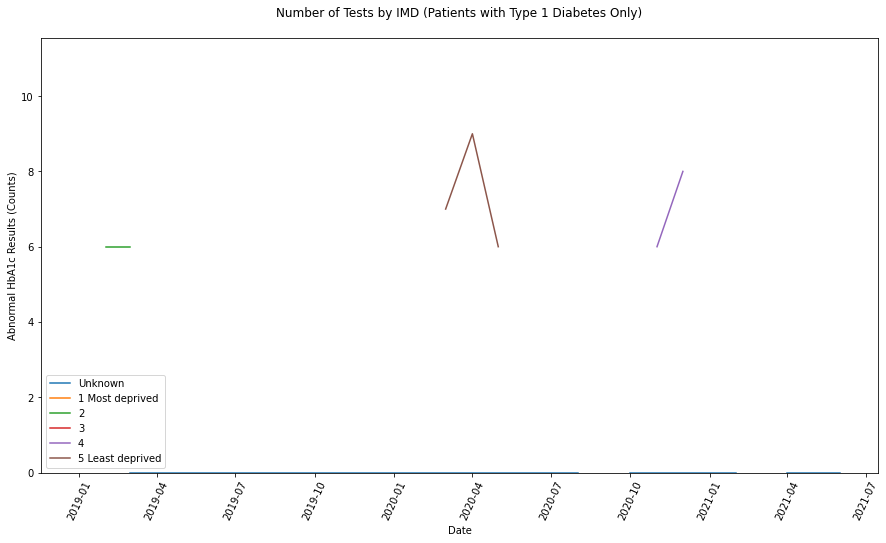

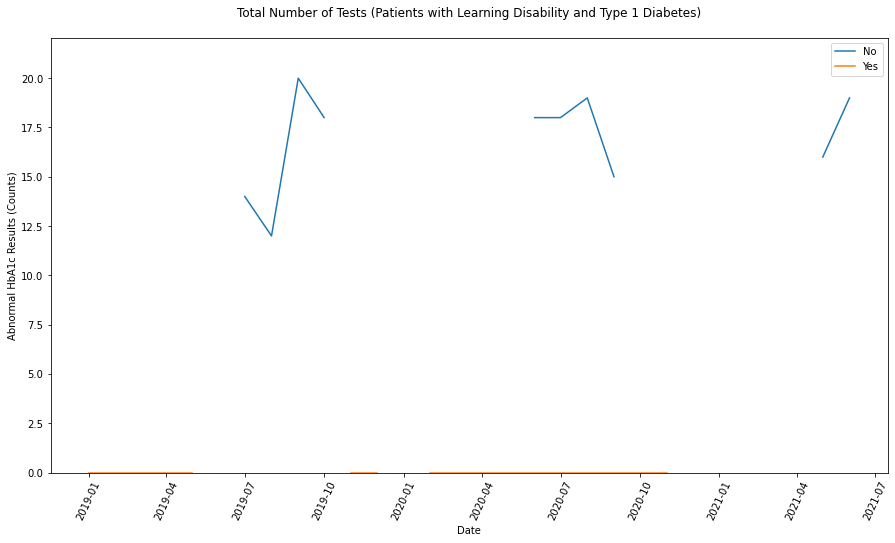

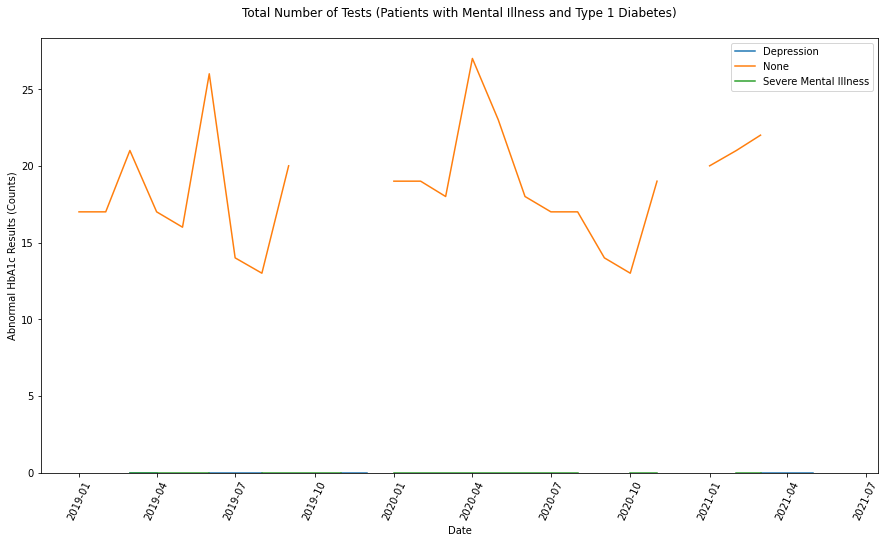

In [19]:
# Population
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Number of Tests (Patients with Type 1 Diabetes Only)',
             'population', df_pop_t1, y_min, y_max)

# Age
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Age (Patients with Type 1 Diabetes Only)',
             'age_group', df_age_t1.loc[df_age_t1.age_group != 'missing'], 
             y_min, y_max)

# Sex
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Sex (Patients with Type 1 Diabetes Only)',
             'sex', df_sex_t1.loc[df_sex_t1.sex.isin(['F','M'])], 
             y_min, y_max)

# Ethnicity
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Ethnicity (Patients with Type 1 Diabetes Only)',
             'ethnicity', df_eth, y_min, y_max)

# Region
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Region (Patients with Type 1 Diabetes Only)',
             'region', df_region_t1, y_min, y_max)

# IMD
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by IMD (Patients with Type 1 Diabetes Only)',
             'imd', df_imd_t1, y_min, y_max)

# Learning Disability
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Number of Tests (Patients with Learning Disability and Type 1 Diabetes)',
             'learning_disability', df_ld_t1, y_min, y_max)

# Mental Illness
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Number of Tests (Patients with Mental Illness and Type 1 Diabetes)',
             'mental_illness', df_mi_t1, y_min, y_max)

## Count of All Tests (Patients with Type 1 Diabetes Only)

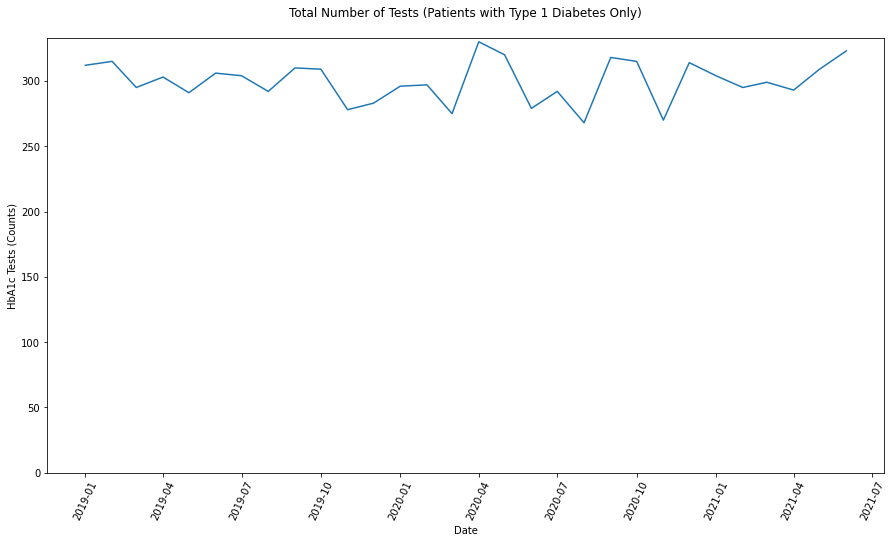

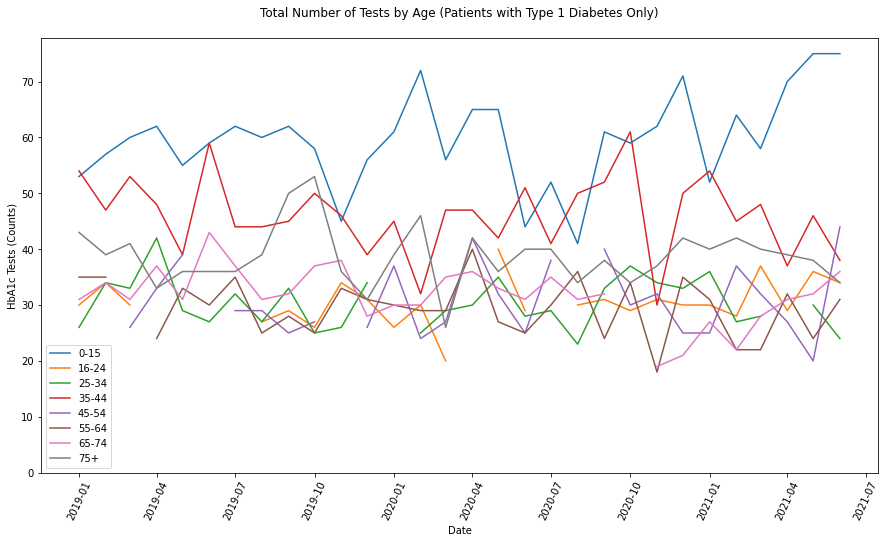

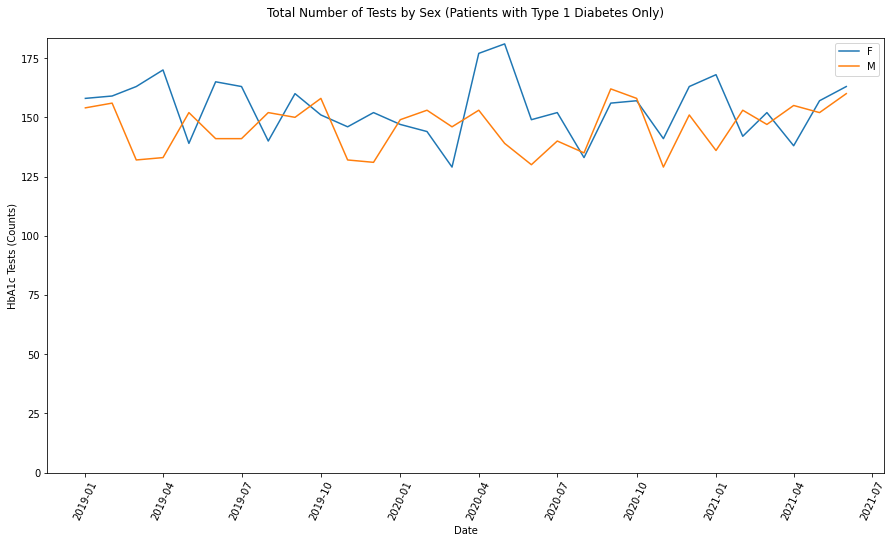

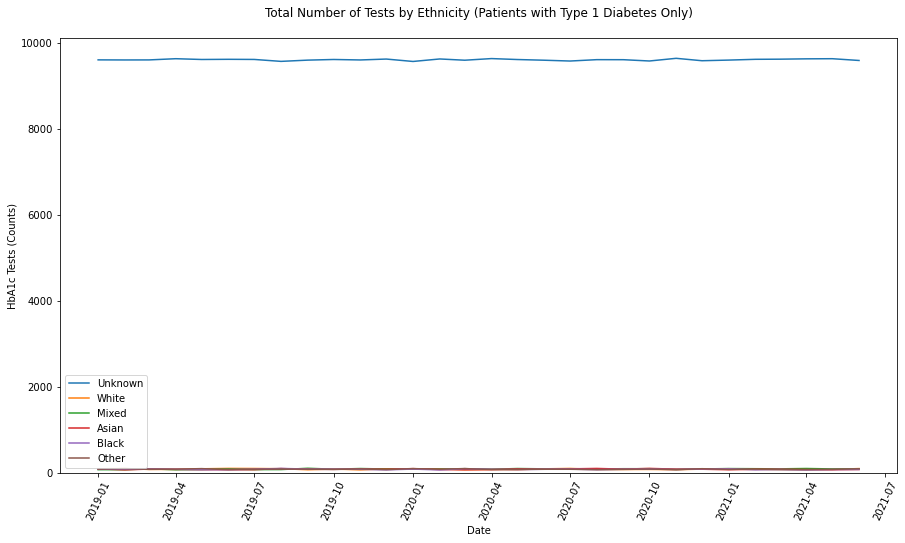

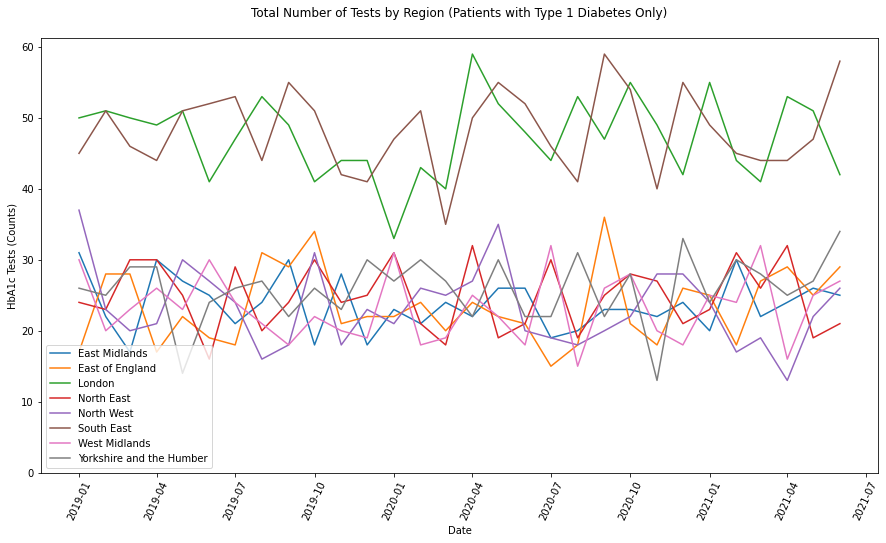

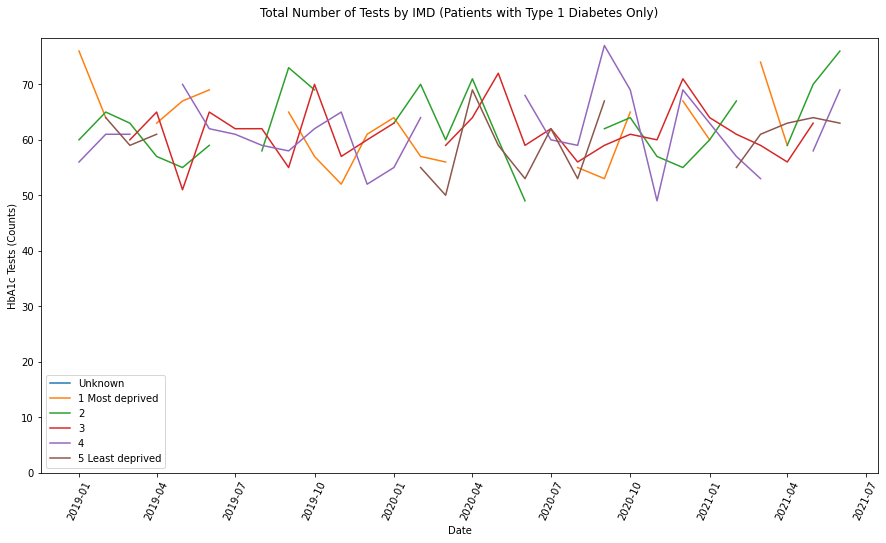

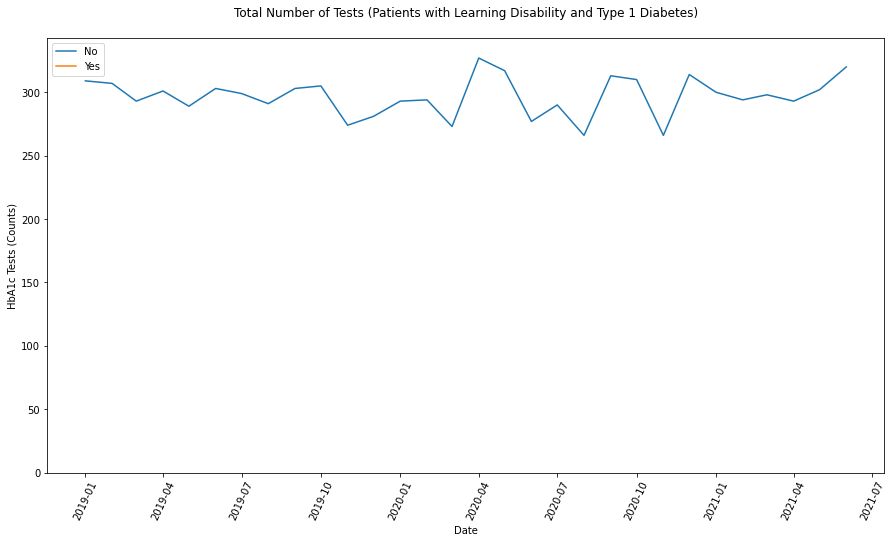

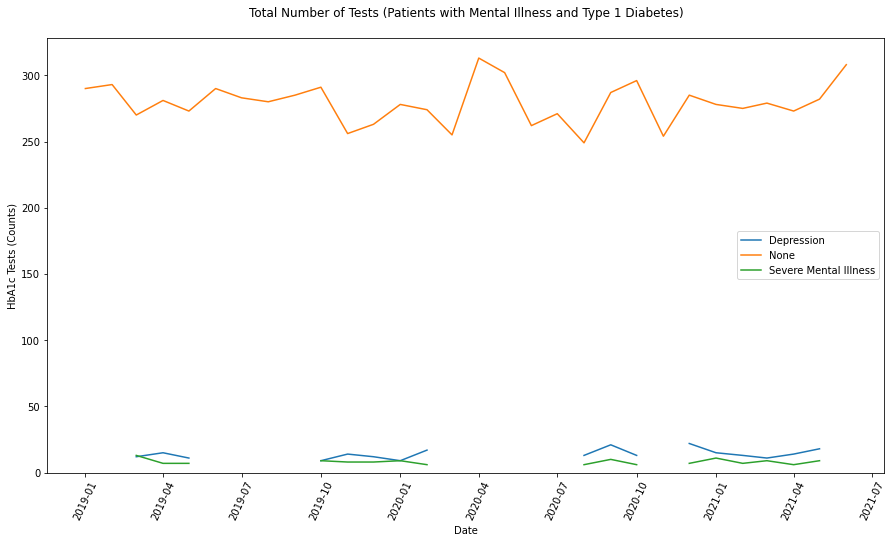

In [34]:
# Population
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests (Patients with Type 1 Diabetes Only)',
             'population', df_pop_t1, y_min, y_max)

# Age
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests by Age (Patients with Type 1 Diabetes Only)',
             'age_group', df_age_t1.loc[df_age_t1.age_group != 'missing'], 
             y_min, y_max)

# Sex
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests by Sex (Patients with Type 1 Diabetes Only)',
             'sex', df_sex_t1.loc[df_sex_t1.sex.isin(['F','M'])], 
             y_min, y_max)

# Ethnicity
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests by Ethnicity (Patients with Type 1 Diabetes Only)',
             'ethnicity', df_eth, y_min, y_max)

# Region
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests by Region (Patients with Type 1 Diabetes Only)',
             'region', df_region_t1, y_min, y_max)

# IMD
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests by IMD (Patients with Type 1 Diabetes Only)',
             'imd', df_imd_t1, y_min, y_max)

# Learning Disability
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests (Patients with Learning Disability and Type 1 Diabetes)',
             'learning_disability', df_ld_t1, y_min, y_max)

# Mental Illness
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests (Patients with Mental Illness and Type 1 Diabetes)',
             'mental_illness', df_mi_t1, y_min, y_max)

## Percentage of Abnormal Results of All Tests (Patients with Type 1 Diabetes Only)

In [35]:
pct_min_t1 = 80
pct_max_t1 = 100

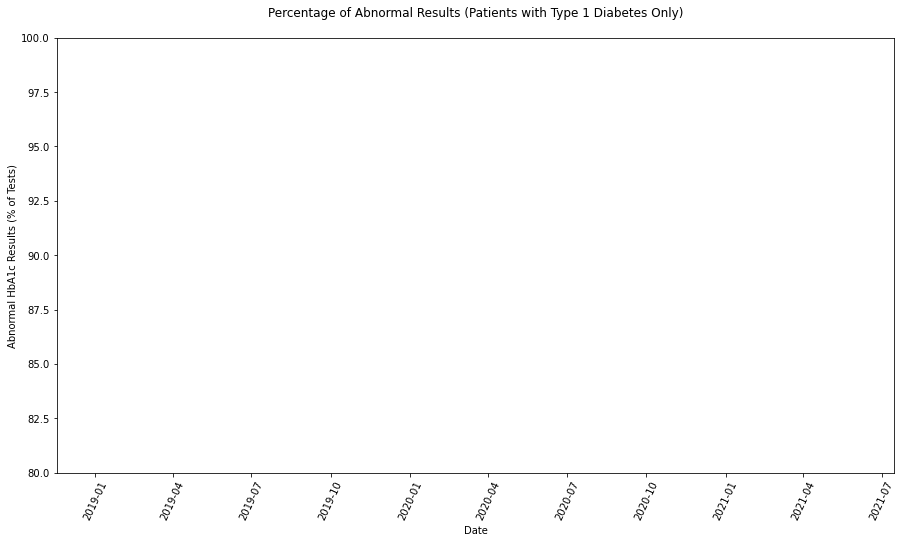

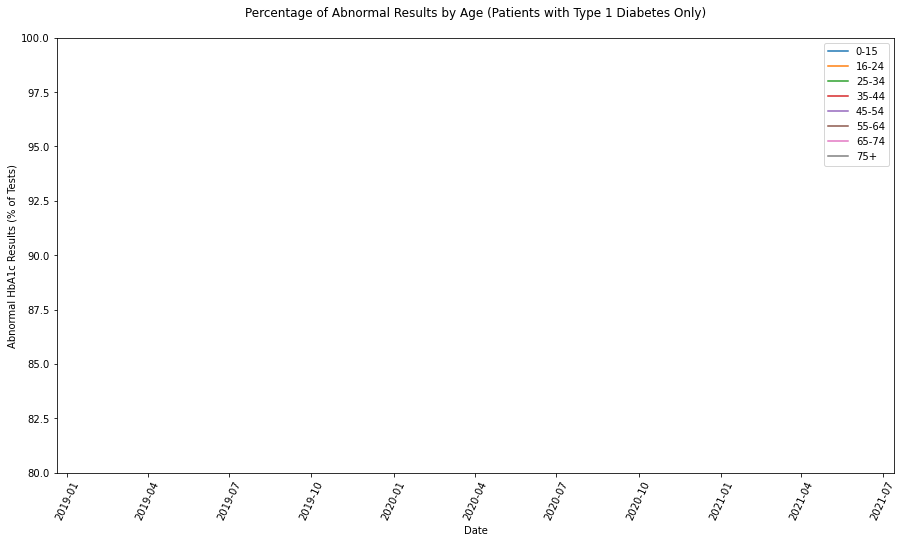

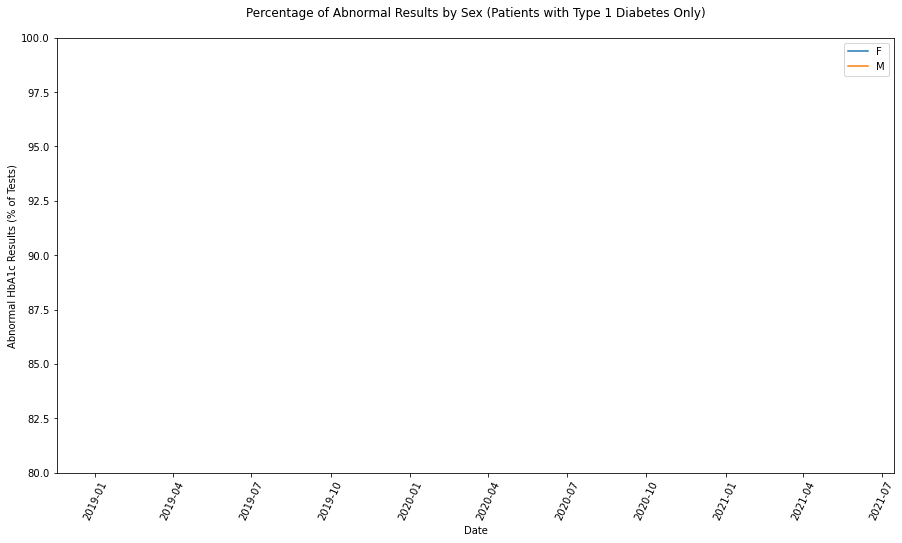

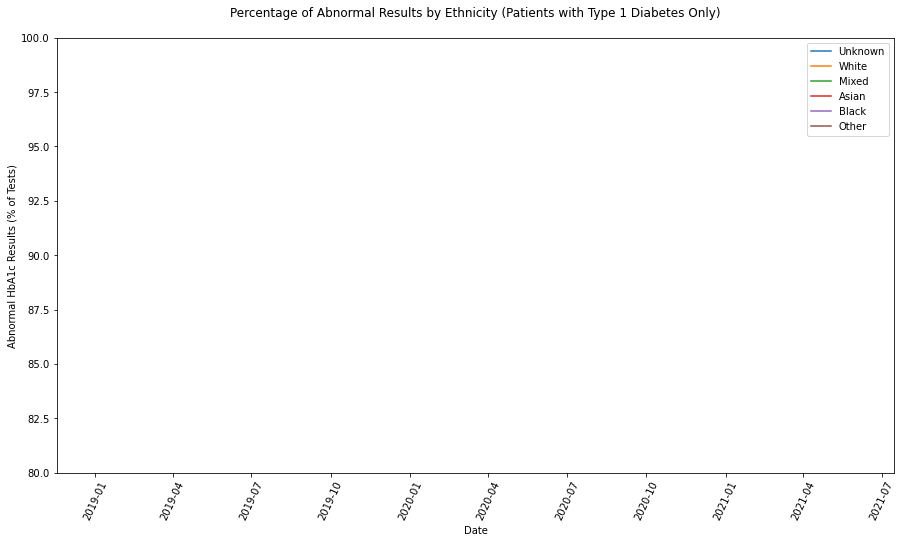

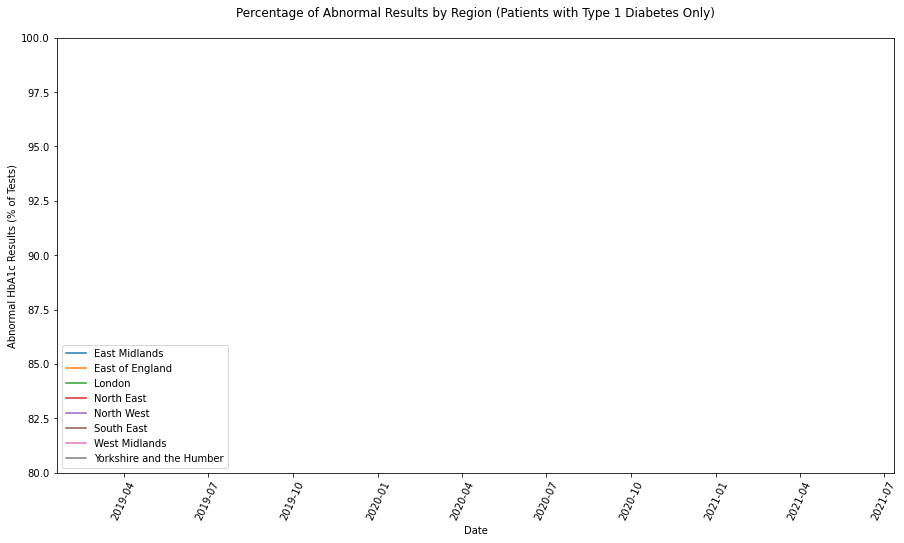

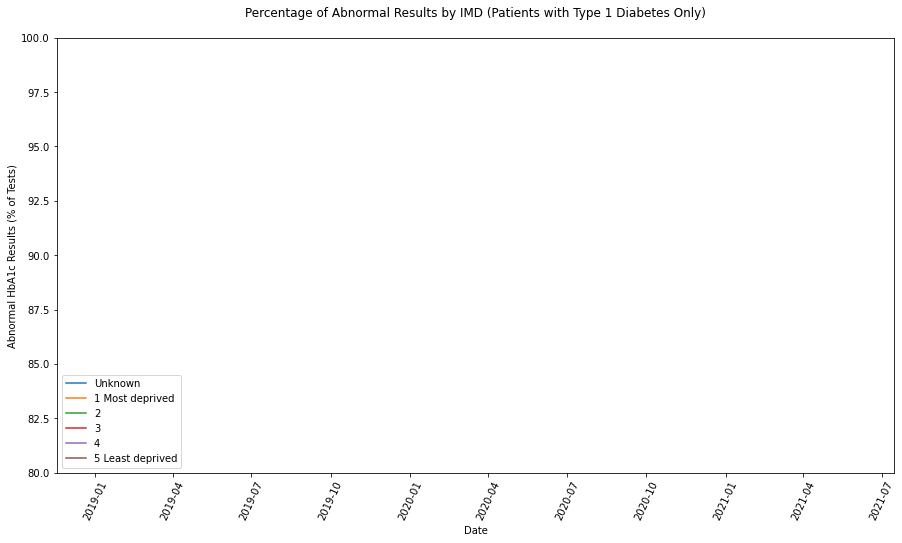

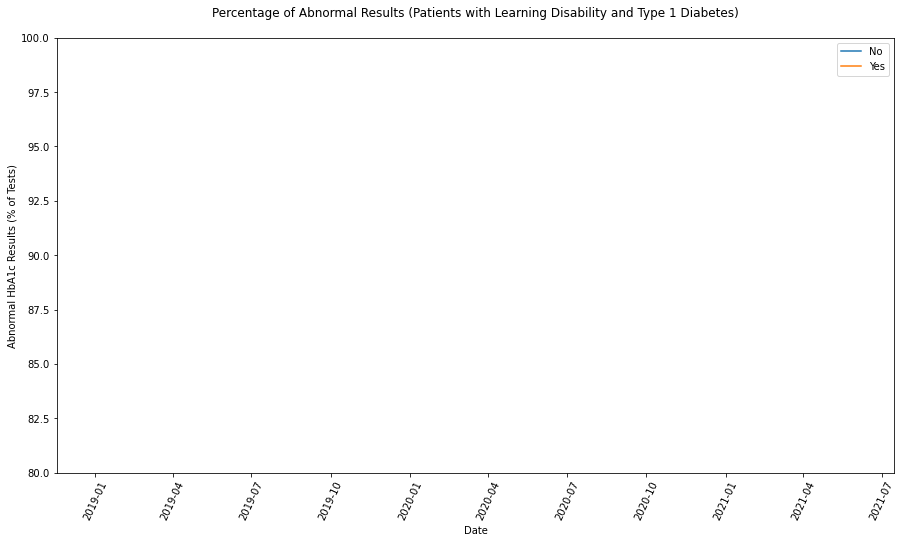

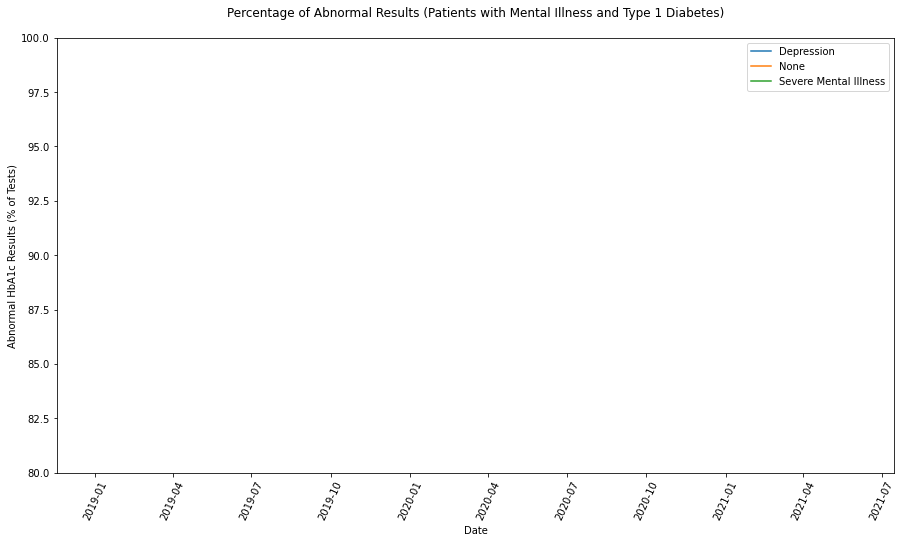

In [36]:
# Population
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results (Patients with Type 1 Diabetes Only)',
             'population', df_pop_t1, pct_min_t1, pct_max_t1)

# Age
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Age (Patients with Type 1 Diabetes Only)',
             'age_group', df_age_t1.loc[df_age_t1.age_group != 'missing'], 
             pct_min_t1, pct_max_t1)

# Sex
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Sex (Patients with Type 1 Diabetes Only)',
             'sex', df_sex_t1.loc[df_sex_t1.sex.isin(['F','M'])], pct_min_t1, pct_max_t1)

# Ethnicity
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Ethnicity (Patients with Type 1 Diabetes Only)',
             'ethnicity', df_eth_t1, pct_min_t1, pct_max_t1)

# Region
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Region (Patients with Type 1 Diabetes Only)',
             'region', df_region_t1, pct_min_t1, pct_max_t1)

# IMD
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by IMD (Patients with Type 1 Diabetes Only)',
             'imd', df_imd_t1, pct_min_t1, pct_max_t1)

# Learning Disability
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results (Patients with Learning Disability and Type 1 Diabetes)',
             'learning_disability', df_ld_t1, pct_min_t1, pct_max_t1)

# Mental Illness
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results (Patients with Mental Illness and Type 1 Diabetes)',
             'mental_illness', df_mi_t1, pct_min_t1, pct_max_t1)

_________

## Count of Abnormal Results (Patients with Type 2 Diabetes Only)

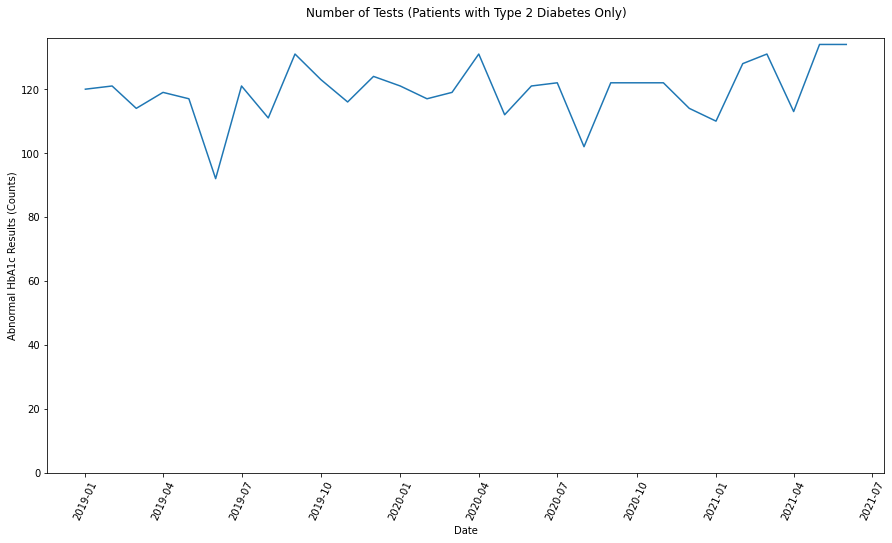

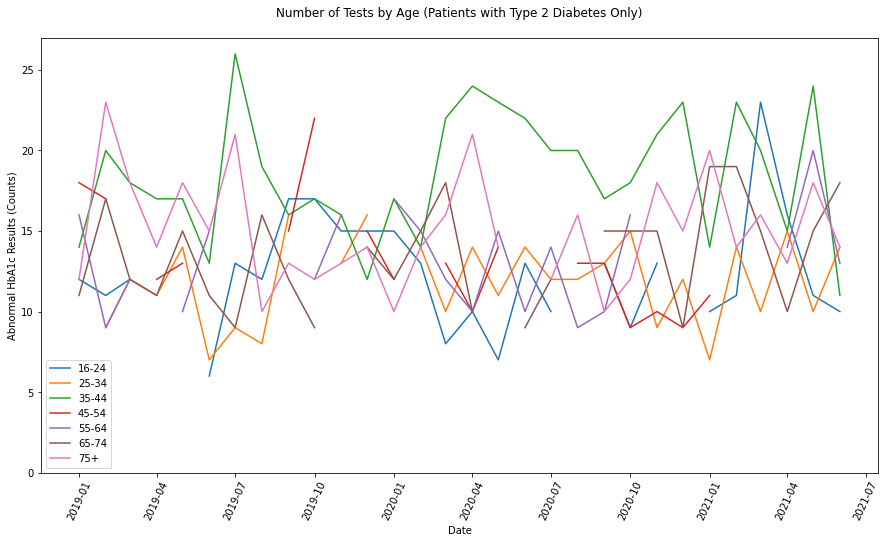

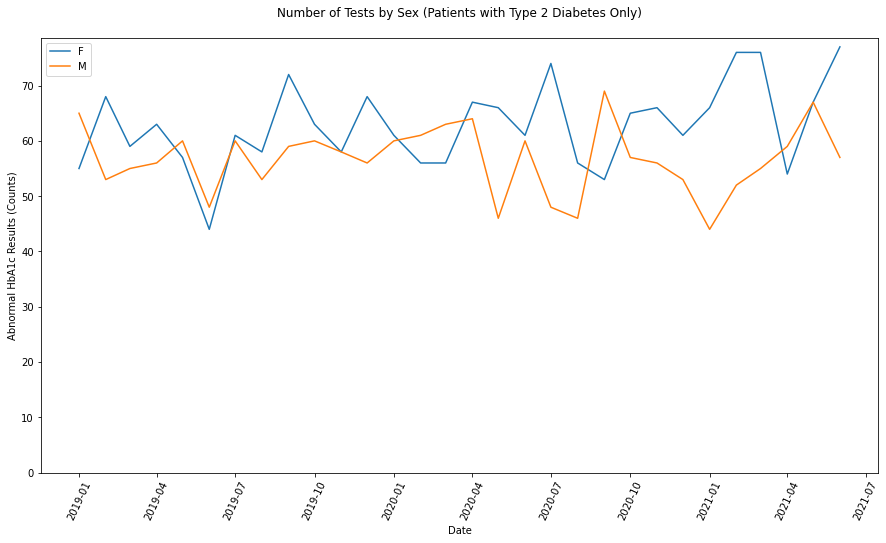

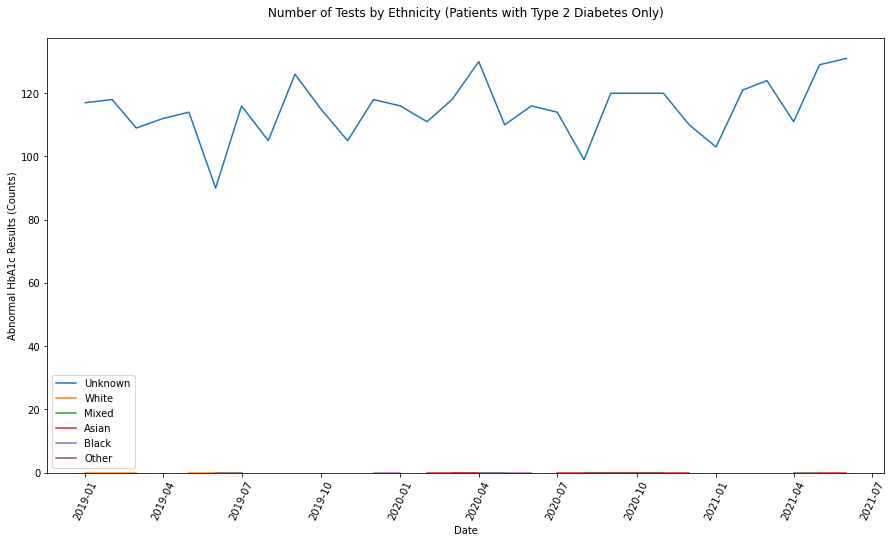

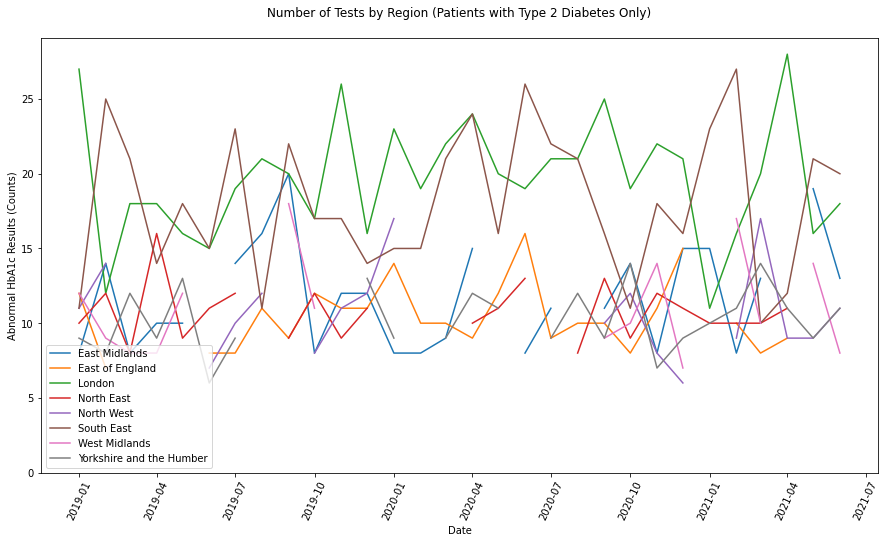

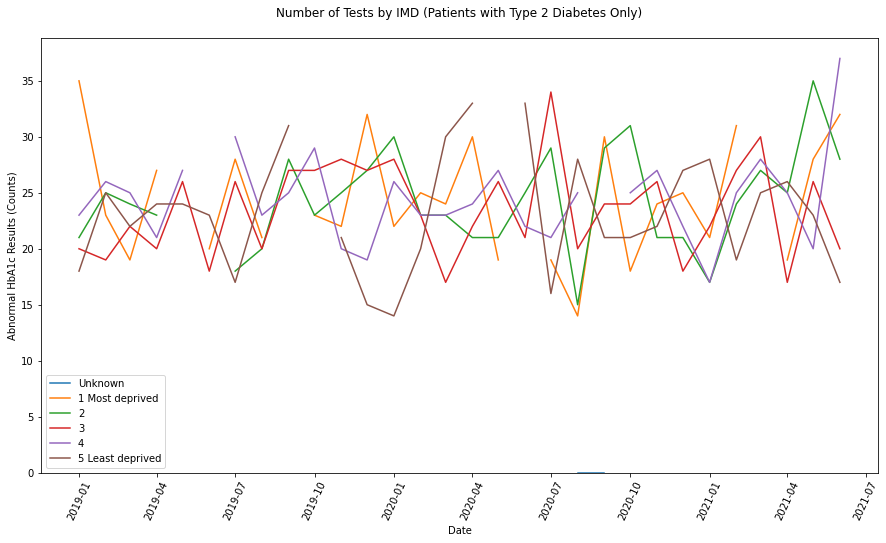

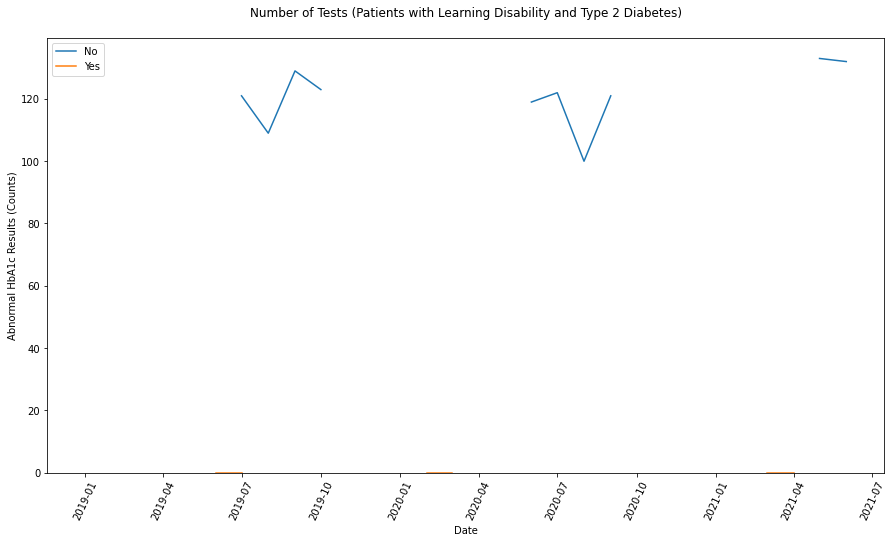

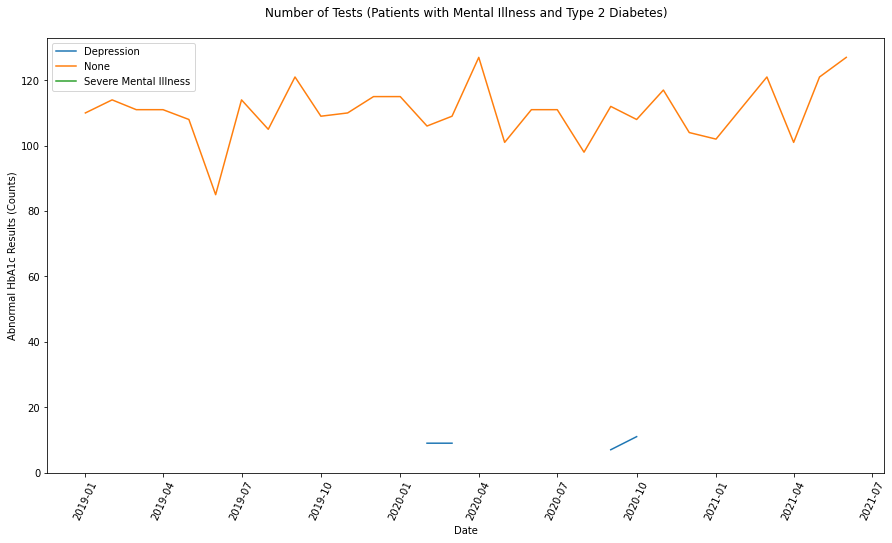

In [37]:
# Population
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Number of Tests (Patients with Type 2 Diabetes Only)',
             'population', df_pop_t2, y_min, y_max)

# Age
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Age (Patients with Type 2 Diabetes Only)',
             'age_group', df_age_t2.loc[(df_age_t2.age_group != 'missing')], 
             y_min, y_max)

# Sex
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Sex (Patients with Type 2 Diabetes Only)',
             'sex', df_sex_t2.loc[df_sex_t2.sex.isin(['F','M'])], y_min, y_max)

# Ethnicity
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Ethnicity (Patients with Type 2 Diabetes Only)',
             'ethnicity', df_eth_t2, y_min, y_max)

# Region
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Region (Patients with Type 2 Diabetes Only)',
             'region', df_region_t2, y_min, y_max)

# IMD
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by IMD (Patients with Type 2 Diabetes Only)',
             'imd', df_imd_t2, y_min, y_max)

# Learning Disability
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Number of Tests (Patients with Learning Disability and Type 2 Diabetes)',
             'learning_disability', df_ld_t2, y_min, y_max)

# Mental Illness
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Number of Tests (Patients with Mental Illness and Type 2 Diabetes)',
             'mental_illness', df_mi_t2, y_min, y_max)

## Count of All Tests (Patients with Type 2 Diabetes Only)

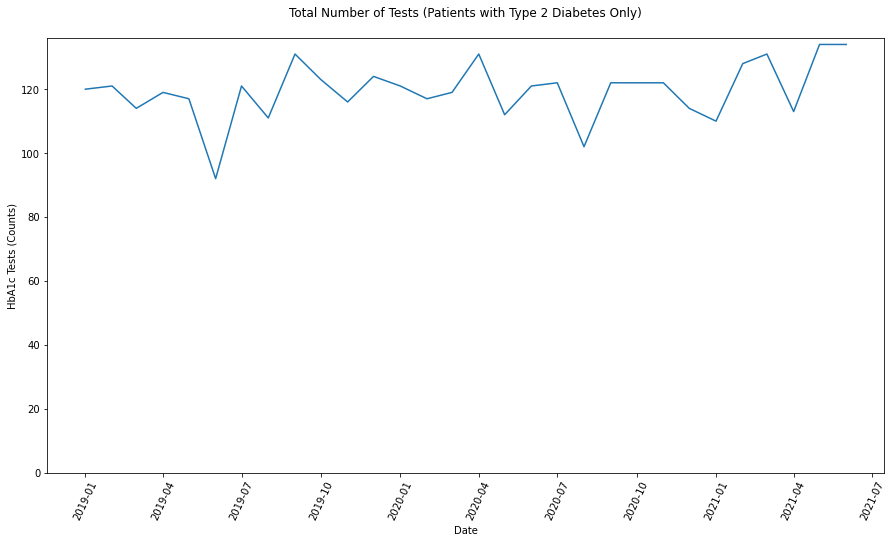

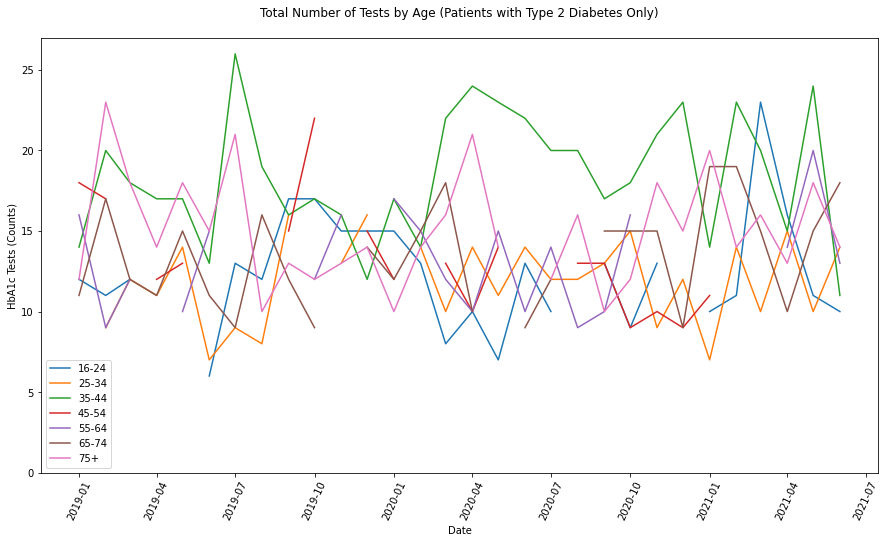

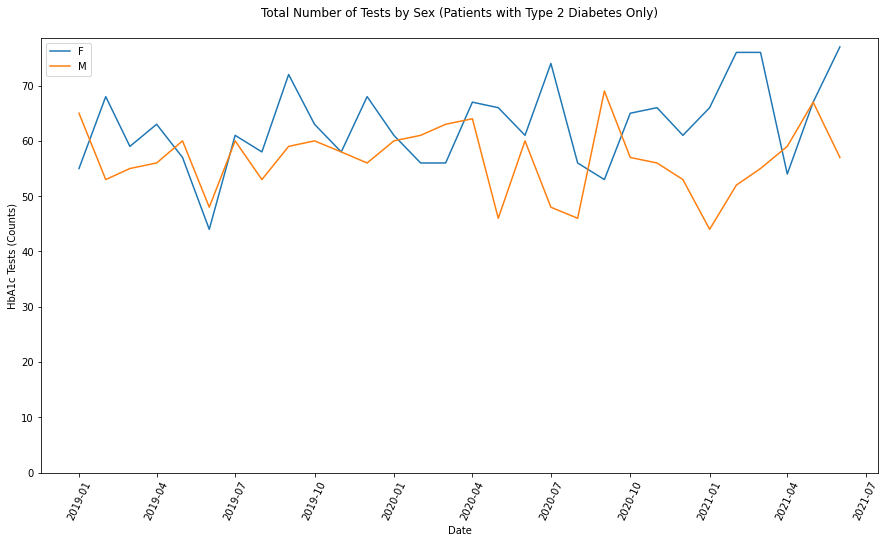

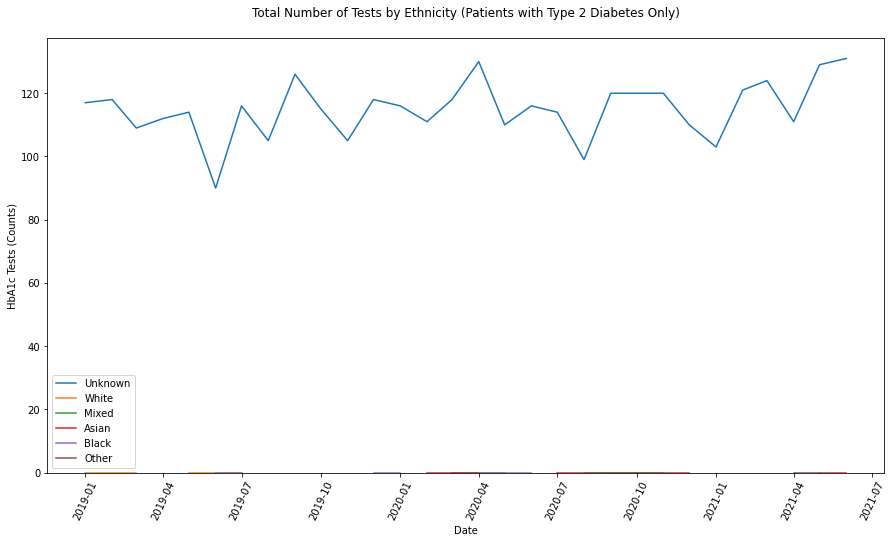

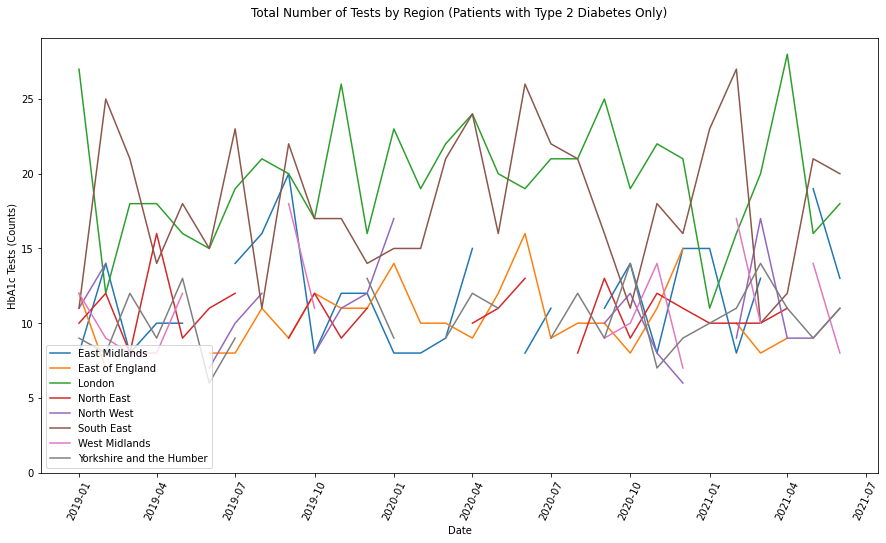

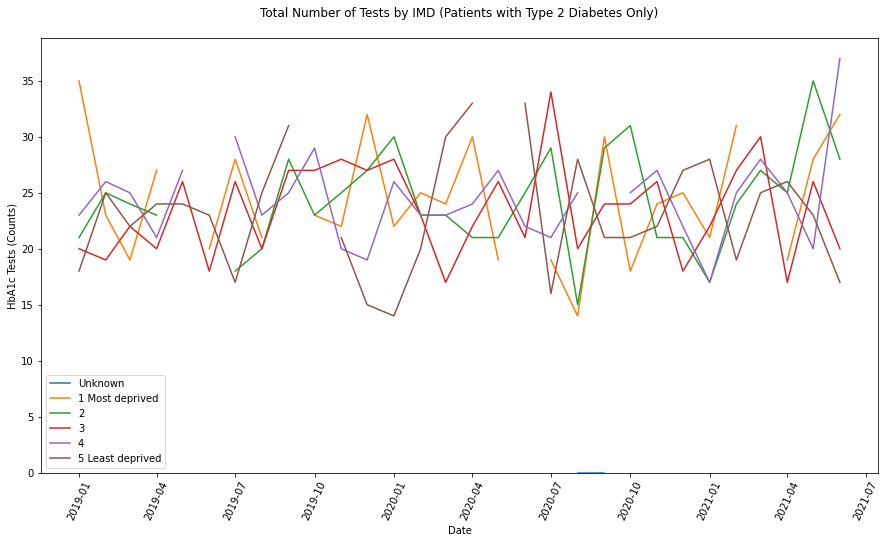

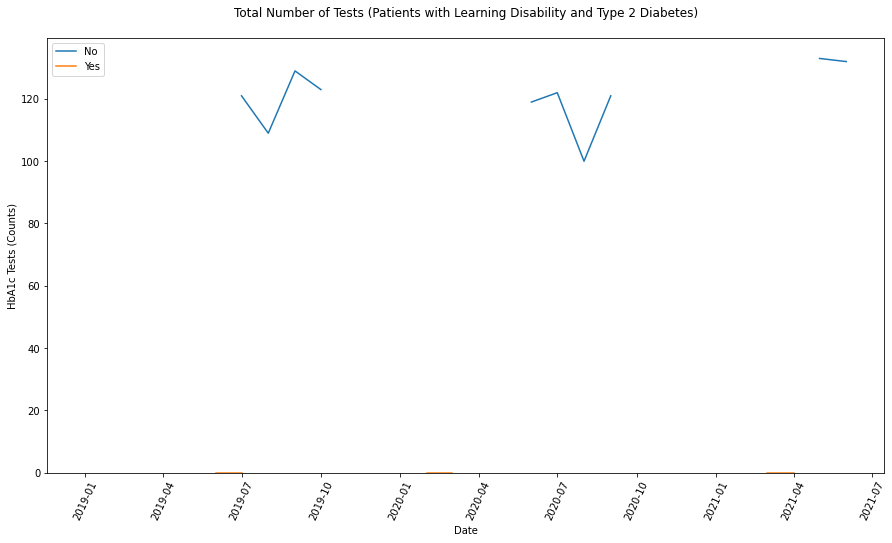

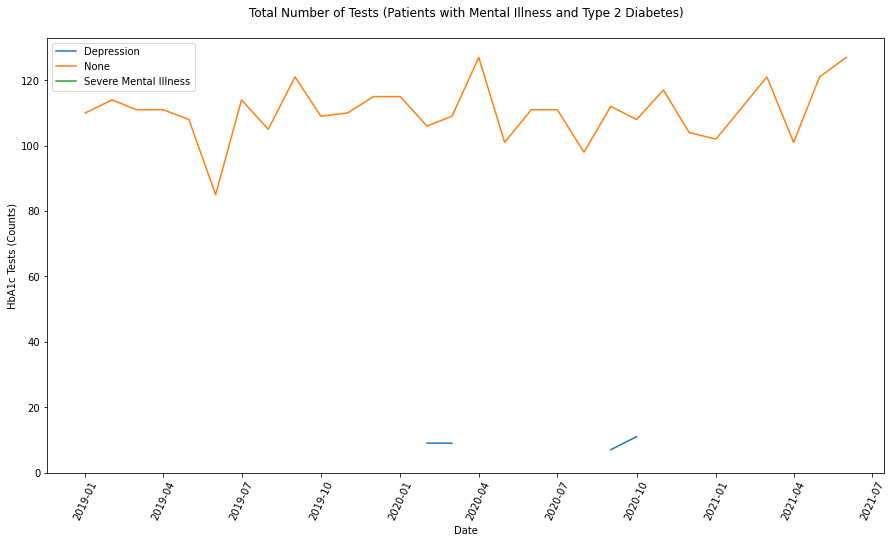

In [38]:
# Population
create_chart('hba1c_abnormal', 'HbA1c Tests (Counts)', 
             'Total Number of Tests (Patients with Type 2 Diabetes Only)',
             'population', df_pop_t2, y_min, y_max)

# Age
create_chart('hba1c_abnormal', 'HbA1c Tests (Counts)',
             'Total Number of Tests by Age (Patients with Type 2 Diabetes Only)',
             'age_group', df_age_t2.loc[(df_age_t2.age_group != 'missing')], 
             y_min, y_max)

# Sex
create_chart('hba1c_abnormal', 'HbA1c Tests (Counts)',
             'Total Number of Tests by Sex (Patients with Type 2 Diabetes Only)',
             'sex', df_sex_t2.loc[df_sex_t2.sex.isin(['F','M'])], y_min, y_max)

# Ethnicity
create_chart('hba1c_abnormal', 'HbA1c Tests (Counts)',
             'Total Number of Tests by Ethnicity (Patients with Type 2 Diabetes Only)',
             'ethnicity', df_eth_t2, y_min, y_max)

# Region
create_chart('hba1c_abnormal', 'HbA1c Tests (Counts)',
             'Total Number of Tests by Region (Patients with Type 2 Diabetes Only)',
             'region', df_region_t2, y_min, y_max)

# IMD
create_chart('hba1c_abnormal', 'HbA1c Tests (Counts)',
             'Total Number of Tests by IMD (Patients with Type 2 Diabetes Only)',
             'imd', df_imd_t2, y_min, y_max)

# Learning Disability
create_chart('hba1c_abnormal', 'HbA1c Tests (Counts)', 
             'Total Number of Tests (Patients with Learning Disability and Type 2 Diabetes)',
             'learning_disability', df_ld_t2, y_min, y_max)

# Mental Illness
create_chart('hba1c_abnormal', 'HbA1c Tests (Counts)', 
             'Total Number of Tests (Patients with Mental Illness and Type 2 Diabetes)',
             'mental_illness', df_mi_t2, y_min, y_max)

## Percentage of Abnormal Results of All Tests (Patients with Type 2 Diabetes Only)

In [39]:
pct_min_t2 = 70
pct_max_t2 = 100

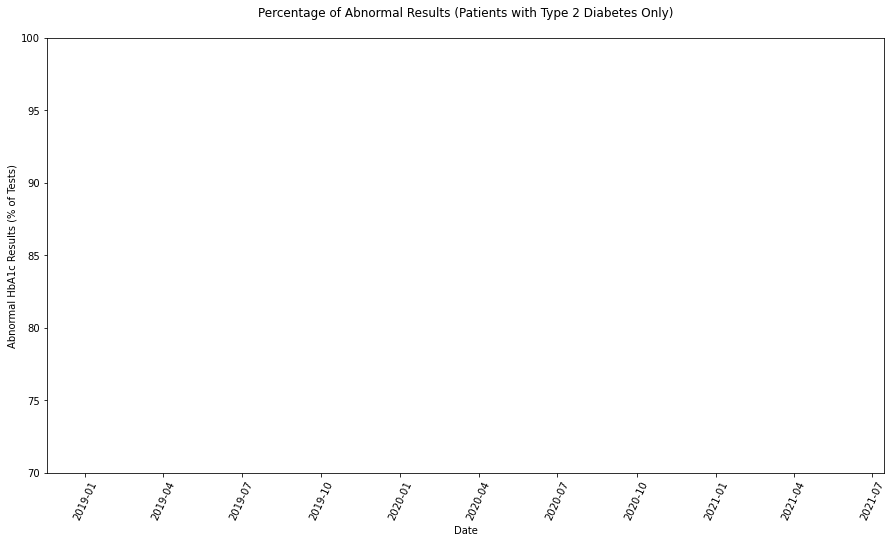

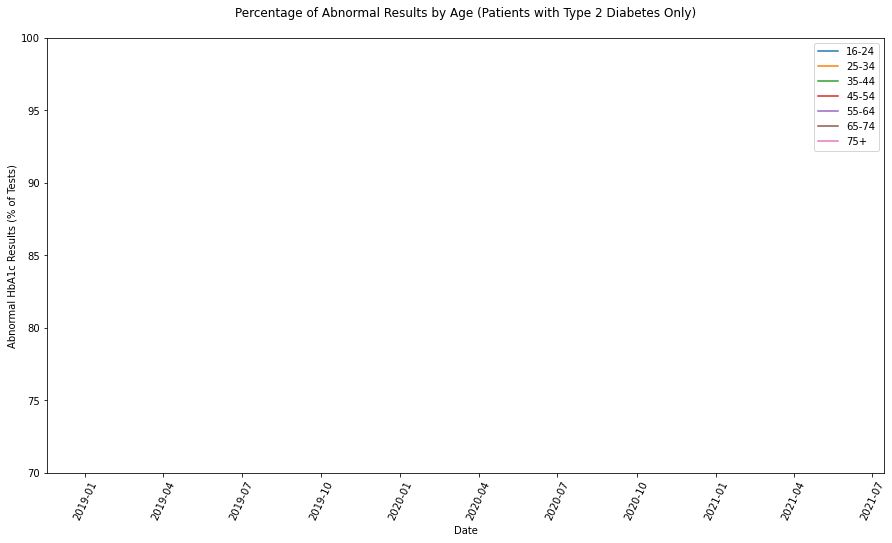

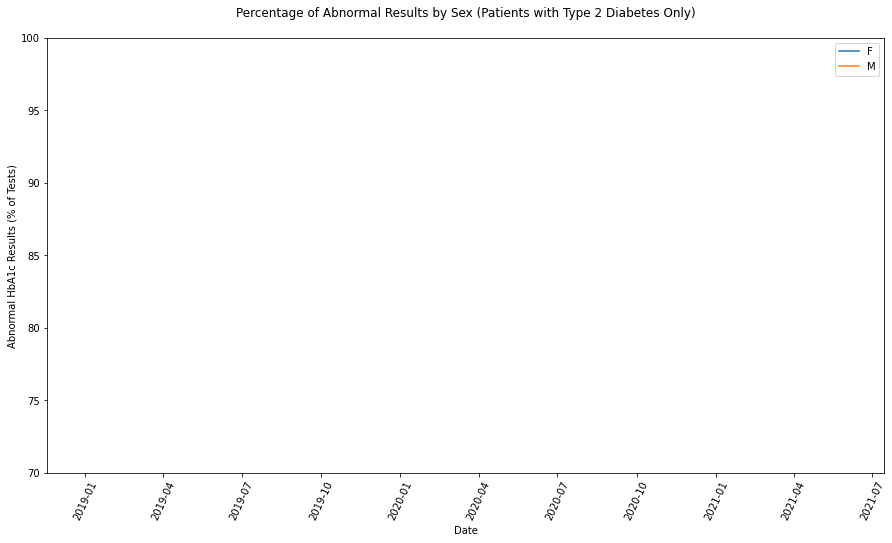

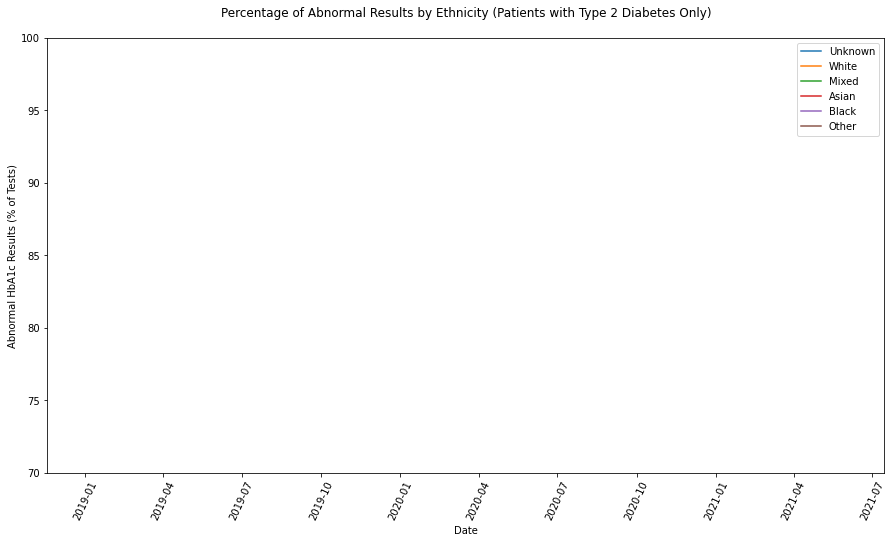

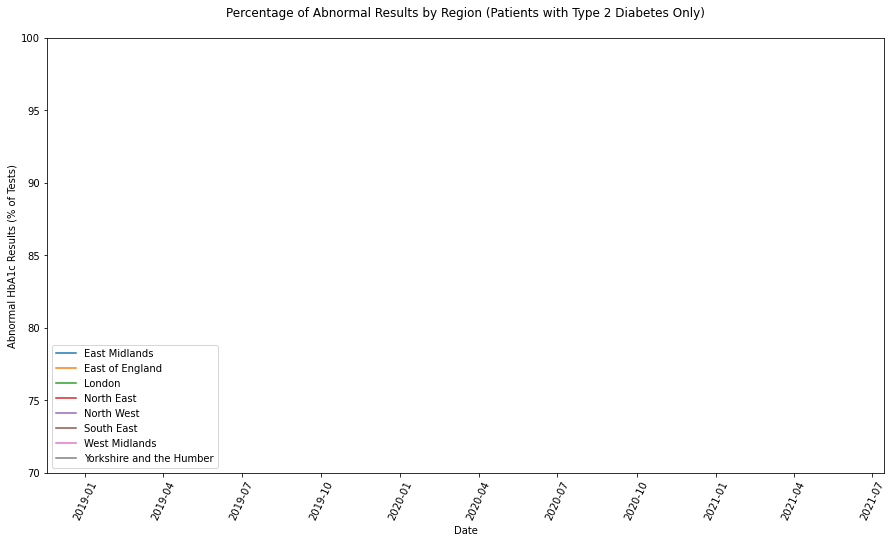

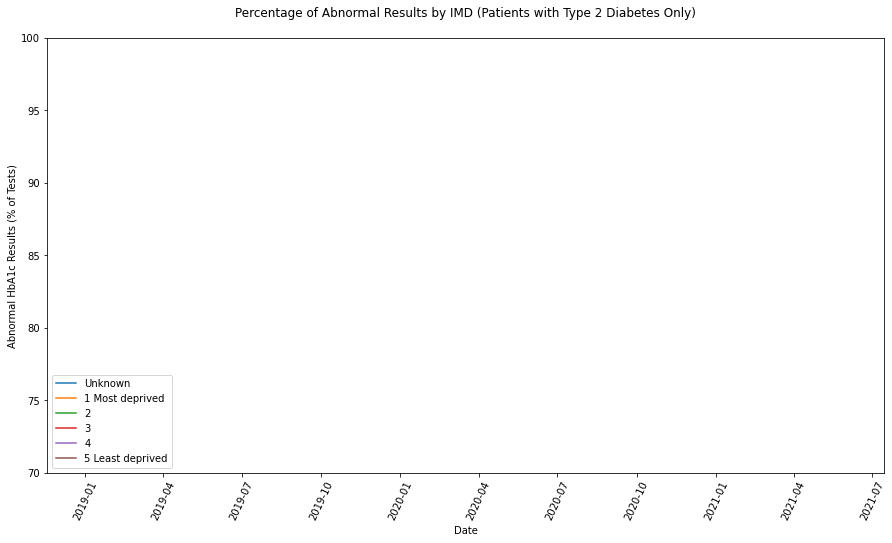

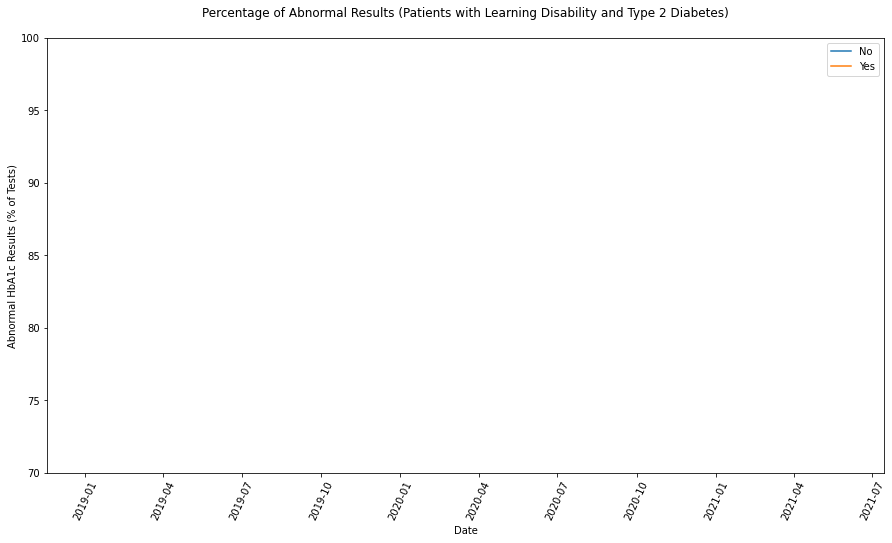

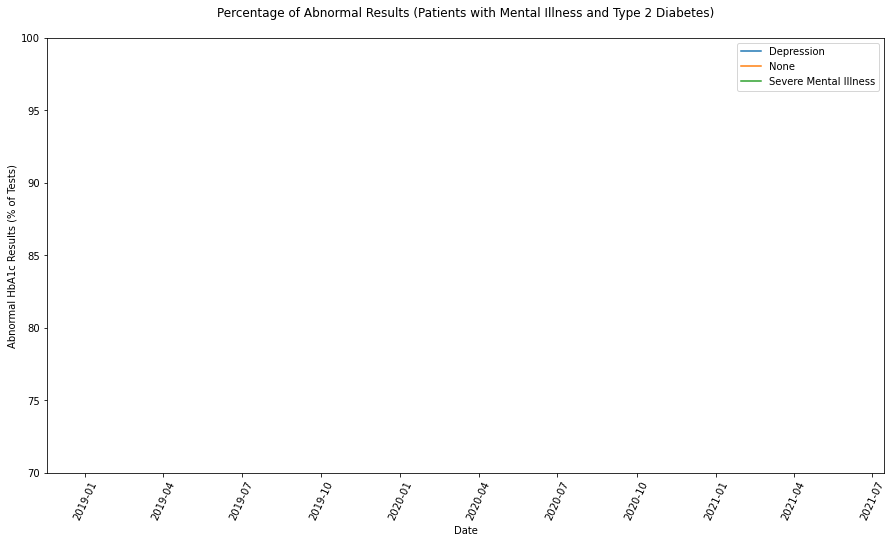

In [40]:
# Population
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results (Patients with Type 2 Diabetes Only)',
             'population', df_pop_t2, pct_min_t2, pct_max_t2)

# Age
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Age (Patients with Type 2 Diabetes Only)',
             'age_group', df_age_t2.loc[(df_age_t2.age_group != 'missing')], 
             pct_min_t2, pct_max_t2)

# Sex
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Sex (Patients with Type 2 Diabetes Only)',
             'sex', df_sex_t2.loc[df_sex_t2.sex.isin(['F','M'])], pct_min_t2, pct_max_t2)

# Ethnicity
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Ethnicity (Patients with Type 2 Diabetes Only)',
             'ethnicity', df_eth_t2, pct_min_t2, pct_max_t2)

# Region
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Region (Patients with Type 2 Diabetes Only)',
             'region', df_region_t2, pct_min_t2, pct_max_t2)

# IMD
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by IMD (Patients with Type 2 Diabetes Only)',
             'imd', df_imd_t2, pct_min_t2, pct_max_t2)

# Learning Disability
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results (Patients with Learning Disability and Type 2 Diabetes)',
             'learning_disability', df_ld_t2, pct_min_t2, pct_max_t2)

# Mental Illness
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results (Patients with Mental Illness and Type 2 Diabetes)',
             'mental_illness', df_mi_t2, pct_min_t2, pct_max_t2)